In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import gc
import glob
import torch
import utils
from scipy.special import erf
from sklearn.calibration import calibration_curve
from sklearn.metrics import (auc, brier_score_loss, confusion_matrix,
                             mean_absolute_error, mean_squared_error,
                             precision_recall_curve, r2_score, roc_curve,
							 precision_score, recall_score, f1_score,
                             mutual_info_score)
from sklearn.feature_selection import mutual_info_regression, r_regression
from scipy.stats import entropy
import utils

In [2]:
model_type = 'swmag'
shap_dir = 'outputs/shap_values'
scaler_dir = 'outputs/scalers'
results_dir = 'outputs/rsd'
VERSION = 'swmag_v6-1'
shap_files = glob.glob(f'{shap_dir}/*{VERSION}*.pkl')
scaler_files = glob.glob(f'{scaler_dir}/*{VERSION}.pkl')
results_files = glob.glob(f'{scaler_dir}/*{VERSION}.feather')
with open('cluster_dict.pkl', 'rb') as f:
	cluster_dict = pickle.load(f)

In [3]:
list_of_oversampled_regions = ['GRL-1', 'GRL-2', 'SVLB', 'JPN-0']

In [4]:
results = {}
for cluster in cluster_dict.values():
	for key, region in cluster['regions'].items():
		results[key] = {}
		if key in list_of_oversampled_regions:
			results[key]['swmag_results'] = pd.read_feather(f'{results_dir}/non_twins_modeling_region_{key}_version_swmag_v6-oversampling.feather')
			results[key]['twins_results'] = pd.read_feather(f'{results_dir}/twins_modeling_region_{key}_version_twins_v_maxpooling_oversampling.feather')
		else:
			results[key]['swmag_results'] = pd.read_feather(f'{results_dir}/non_twins_modeling_region_{key}_version_swmag_v6-1.feather')
			results[key]['twins_results'] = pd.read_feather(f'{results_dir}/twins_modeling_region_{key}_version_twins_v_maxpooling.feather')
		results[key]['mean_lat'] = utils.getting_mean_lat(region['stations'])

Loading station NEW....
Loading station T19....
Loading station C10....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station MEA....
Loading station T36....
Loading station GHB....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station UMQ....
Loading station GHB....
Loading station FHB....
Loading station NAQ....
Loading station RVK....
Loading station LYC....
Loading station DON....
Loading station JCK....
Loading station HAN....
Loading station MEK....
Loading station OUJ....
Loading station NUR....
Loading station MAS....
Loading station NOR....
Loading station 

In [5]:
swmag_auc, maxpool_auc, swmag_roc, maxpool_roc, mean_lat = [], [], [], [], []
for key in results.keys():

	roc = roc_curve(y_true=results[key]['swmag_results']['actual'], y_score=results[key]['swmag_results']['predicted_mean'])
	swmag_roc.append(auc(roc[0], roc[1]))
	roc = roc_curve(y_true=results[key]['twins_results']['actual'], y_score=results[key]['twins_results']['predicted_mean'])
	maxpool_roc.append(auc(roc[0], roc[1]))
	prec, rec, __ = precision_recall_curve(y_true=results[key]['swmag_results']['actual'], probas_pred=results[key]['swmag_results']['predicted_mean'])
	swmag_auc.append(auc(rec, prec))
	prec, rec, __ = precision_recall_curve(y_true=results[key]['twins_results']['actual'], probas_pred=results[key]['twins_results']['predicted_mean'])
	maxpool_auc.append(auc(rec, prec))
	mean_lat.append(results[key]['mean_lat'])


In [6]:
swmag_plot_df = pd.DataFrame({'mean_lat':mean_lat, 'swmag_auc':swmag_auc, 'swmag_roc':swmag_roc})
maxpool_plot_df = pd.DataFrame({'mean_lat':mean_lat, 'twins_auc':maxpool_auc, 'twins_roc':maxpool_roc})

swmag_plot_df.sort_values(by='mean_lat', inplace=True)
maxpool_plot_df.sort_values(by='mean_lat', inplace=True)

Region: GRL-3
SWMAG: 	F1: 0.7629	AUC: 0.8457	MI: 0.4922
TWIN: 	F1: 0.7602	AUC: 0.8457	MI: 0.4923
Region: FSC-6
SWMAG: 	F1: 0.7379	AUC: 0.8232	MI: 0.4412
TWIN: 	F1: 0.7405	AUC: 0.8276	MI: 0.4412
Region: ALSK
SWMAG: 	F1: 0.8271	AUC: 0.8894	MI: 0.5066
TWIN: 	F1: 0.8314	AUC: 0.8949	MI: 0.5066


/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received bina

Region: CAN-2
SWMAG: 	F1: 0.8857	AUC: 0.9397	MI: 0.4795
TWIN: 	F1: 0.8866	AUC: 0.941	MI: 0.4793
Region: CEU-1
SWMAG: 	F1: 0.7098	AUC: 0.7991	MI: 0.5782
TWIN: 	F1: 0.7134	AUC: 0.7986	MI: 0.5782
Region: JPN-1
SWMAG: 	F1: 0.4969	AUC: 0.5213	MI: 0.5643
TWIN: 	F1: 0.4879	AUC: 0.4848	MI: 0.5643


/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received bina

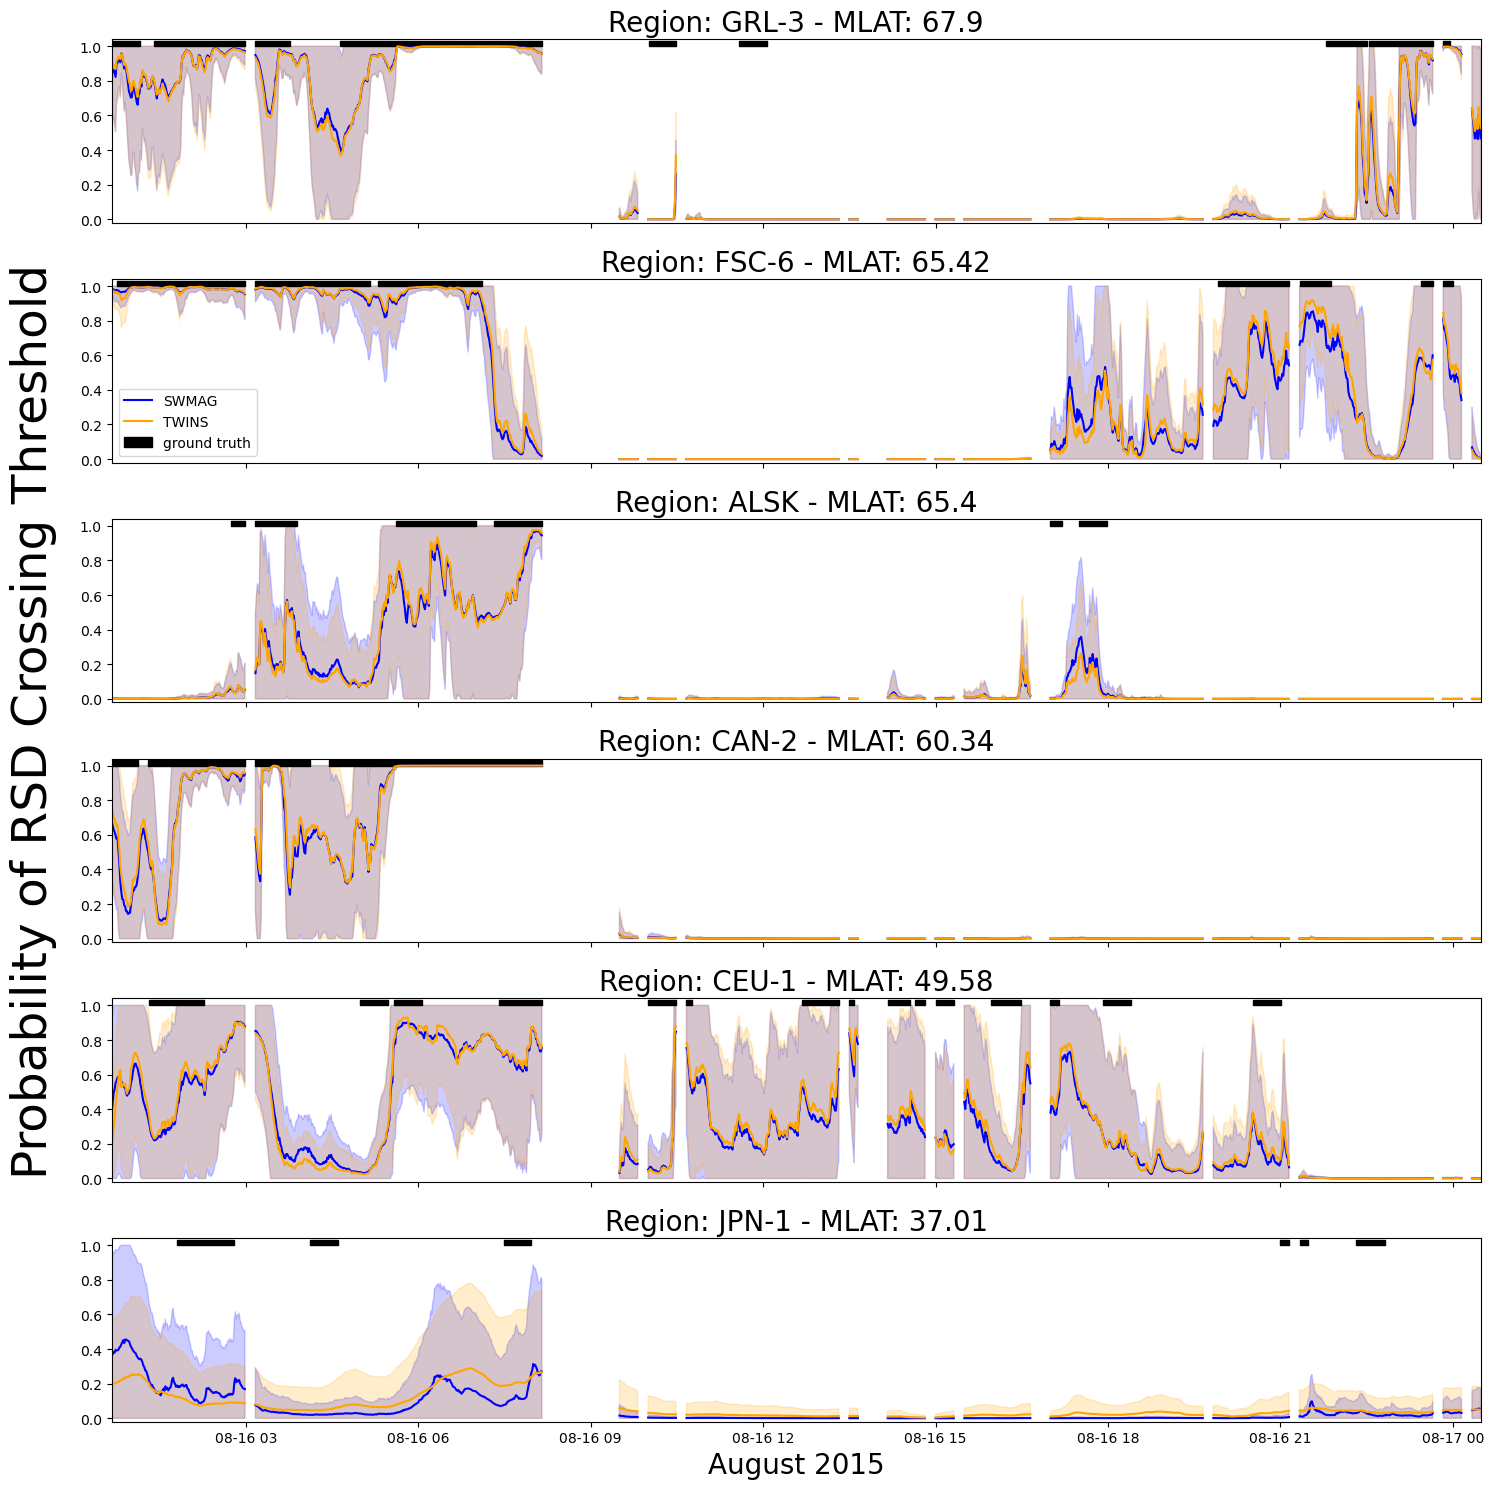

In [7]:
selected_region = 'FSC-6'

def preparing_results_plotting(region, start_date, end_date):

	list_oversampled = ['JPN-0', 'GRL-1', 'GRL-2', 'SVLB']
	if region in list_oversampled:
		swmag_results = pd.read_feather(f'outputs/rsd/non_twins_modeling_region_{region}_version_swmag_v6-oversampling.feather')
		twins_results = pd.read_feather(f'outputs/rsd/twins_modeling_region_{region}_version_twins_v_maxpooling_oversampling.feather')
	else:
		swmag_results = pd.read_feather(f'outputs/rsd/non_twins_modeling_region_{region}_version_swmag_v6-1.feather')
		twins_results = pd.read_feather(f'outputs/rsd/twins_modeling_region_{region}_version_twins_v_maxpooling.feather')

	swmag_results.set_index('dates', inplace=True)
	twins_results.set_index('dates', inplace=True)

	print(f'Region: {sel_reg}')
	prec, rec, __ = precision_recall_curve(y_true=swmag_results['actual'], probas_pred=swmag_results['predicted_mean'])
	f1 = 2 * (prec * rec) / (prec + rec)
	area = auc(rec, prec)
	MI = mutual_info_score(swmag_results['actual'], swmag_results['predicted_mean'])
	print(f'SWMAG: \tF1: {round(f1[np.argmax(f1)], 4)}\tAUC: {round(area, 4)}\tMI: {round(MI, 4)}')

	prec, rec, __ = precision_recall_curve(y_true=twins_results['actual'], probas_pred=twins_results['predicted_mean'])
	f1 = 2 * (prec * rec) / (prec + rec)
	area = auc(rec, prec)
	MI = mutual_info_score(twins_results['actual'], twins_results['predicted_mean'])
	print(f'TWIN: \tF1: {round(f1[np.argmax(f1)], 4)}\tAUC: {round(area, 4)}\tMI: {round(MI, 4)}')

	# start_date = '2012-03-06 00:00:00'
	# end_date = '2012-03-10 12:00:00'

	plotting_range = pd.date_range(start_date, end_date, freq='min')
	plotting_df = pd.DataFrame(index=plotting_range)
	plotting_df = plotting_df.join(swmag_results['actual'], how='left')
	plotting_df = plotting_df.join(swmag_results['predicted_mean'], how='left')
	plotting_df = plotting_df.join(swmag_results['predicted_std'], how='left')
	plotting_df = plotting_df.join(twins_results['predicted_mean'], how='left', rsuffix='_twins')
	plotting_df = plotting_df.join(twins_results['predicted_std'], how='left', rsuffix='_twins')
	plotting_df['swmag_fill_bottom'] = plotting_df['predicted_mean'] - plotting_df['predicted_std']
	plotting_df['swmag_fill_top'] = plotting_df['predicted_mean'] + plotting_df['predicted_std']
	plotting_df['twins_fill_bottom'] = plotting_df['predicted_mean_twins'] - plotting_df['predicted_std_twins']
	plotting_df['twins_fill_top'] = plotting_df['predicted_mean_twins'] + plotting_df['predicted_std_twins']
	plotting_df.clip(lower=0, upper=1, inplace=True)
	plotting_df['bottom'] = plotting_df['actual']*1.00
	plotting_df['top'] = plotting_df['actual']*1.03

	return plotting_df

start_date = '2015-08-10 00:00:00'
end_date = '2015-08-20 12:00:00'
selected_regions = ['GRL-3', 'FSC-6', 'ALSK', 'CAN-2', 'CEU-1', 'JPN-1']

fig, axes = plt.subplots(len(selected_regions), 1, figsize=(15, 15), sharex=True)

for i, sel_reg in enumerate(selected_regions):
	plotting_df = preparing_results_plotting(sel_reg, start_date, end_date)
	# creates an array from the y_bar dataframe
	z1=np.array(plotting_df['bottom'])
	# creates another array. These two arrays are compared to create the bar at the top of the plots.
	z2=np.array(plotting_df['top'])

	axes[i].plot(plotting_df.loc[start_date:end_date, 'predicted_mean'], color='blue', label='SWMAG')
	axes[i].fill_between(plotting_df.loc[start_date:end_date].index, plotting_df.loc[start_date:end_date, 'swmag_fill_bottom'], plotting_df.loc[start_date:end_date, 'swmag_fill_top'], color='blue', alpha=0.2)
	axes[i].plot(plotting_df.loc[start_date:end_date, 'predicted_mean_twins'], color='orange', label='TWINS')
	axes[i].fill_between(plotting_df.loc[start_date:end_date].index, plotting_df.loc[start_date:end_date, 'twins_fill_bottom'], plotting_df.loc[start_date:end_date, 'twins_fill_top'], color='orange', alpha=0.2)
	axes[i].fill_between(plotting_df.index, plotting_df['bottom'], plotting_df['top'], where=z2>z1, alpha=1, label='ground truth', color='black')
	mlat = str(round(results[sel_reg]['mean_lat'], 2))
	axes[i].set_title(f'Region: {sel_reg} - MLAT: {mlat}', fontsize=20)
	plt.margins(x=0, y=0)
	axes[i].set_ylim(-0.02,1.04)

axes[1].legend(loc='lower left')
axes[(len(selected_regions)-1)//2].set_ylabel('Probability of RSD Crossing Threshold', fontsize=35)
axes[(len(selected_regions)-1)//2].yaxis.set_label_coords(-0.04,-0.1)
axes[len(selected_regions)-1].set_xlabel('August 2015', fontsize=20)
plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()

plt.savefig(f'plots/GEM_2024_plots/regions_example.png')


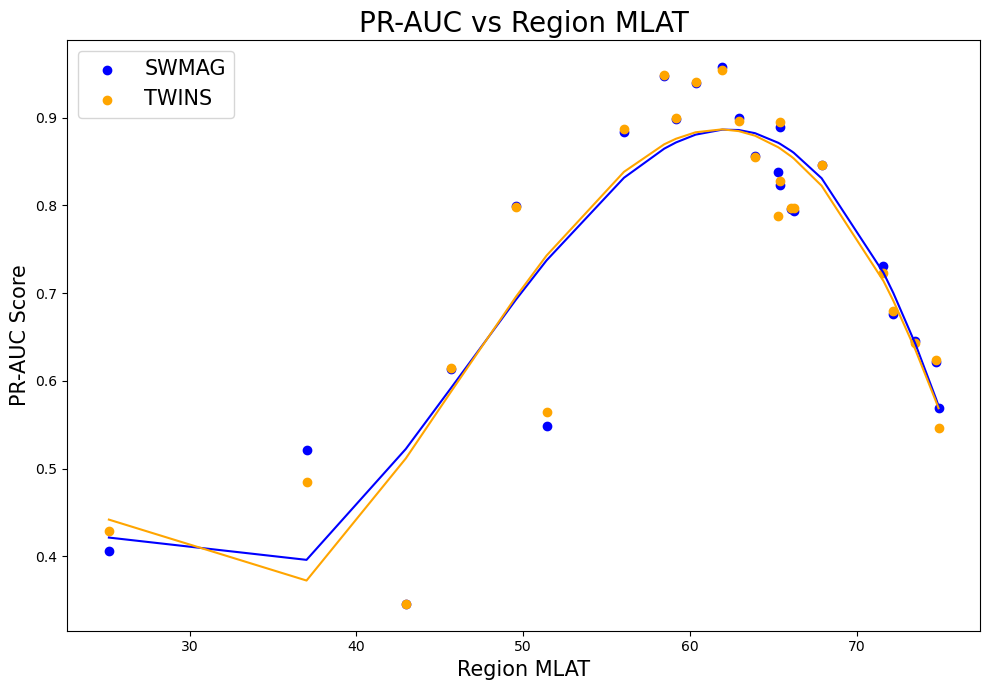

In [8]:
fig, axes = plt.subplots(1,1,figsize=(10,7))
axes.scatter(swmag_plot_df['mean_lat'], swmag_plot_df['swmag_auc'], label='SWMAG', color='blue')
axes.scatter(maxpool_plot_df['mean_lat'], maxpool_plot_df['twins_auc'], label='TWINS', color='orange')

swmag_z = np.polyfit(swmag_plot_df['mean_lat'], swmag_plot_df['swmag_auc'], 4)
swmag_p = np.poly1d(swmag_z)
maxpool_z = np.polyfit(maxpool_plot_df['mean_lat'], maxpool_plot_df['twins_auc'], 4)
maxpool_p = np.poly1d(maxpool_z)

axes.plot(swmag_plot_df['mean_lat'], swmag_p(swmag_plot_df['mean_lat']), color='blue')
axes.plot(maxpool_plot_df['mean_lat'], maxpool_p(maxpool_plot_df['mean_lat']), color='orange')

axes.set_xlabel('Region MLAT', fontsize=15)
axes.set_ylabel('PR-AUC Score', fontsize=15)
axes.set_title('PR-AUC vs Region MLAT', fontsize=20)
axes.legend(loc='upper left', fontsize=15)
plt.tight_layout()
plt.savefig(f'plots/GEM_2024_plots/pr-auc_vs_region_mlat_swmag_maxpool.png')

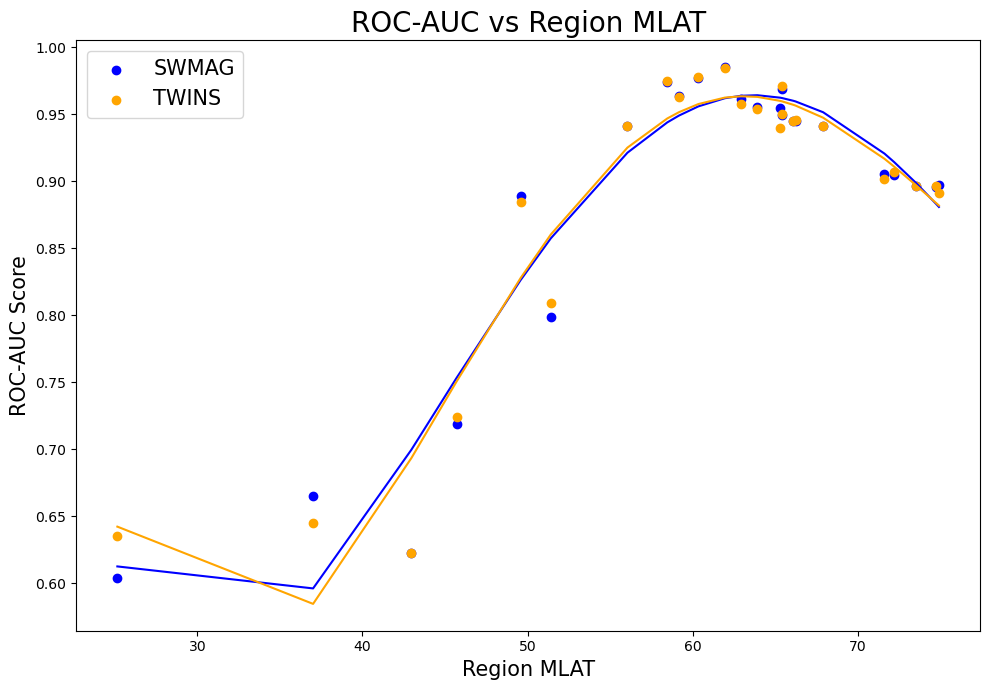

In [9]:
fig, axes = plt.subplots(1,1,figsize=(10,7))
axes.scatter(swmag_plot_df['mean_lat'], swmag_plot_df['swmag_roc'], label='SWMAG', color='blue')
axes.scatter(maxpool_plot_df['mean_lat'], maxpool_plot_df['twins_roc'], label='TWINS', color='orange')

swmag_z = np.polyfit(swmag_plot_df['mean_lat'], swmag_plot_df['swmag_roc'], 4)
swmag_p = np.poly1d(swmag_z)
maxpool_z = np.polyfit(maxpool_plot_df['mean_lat'], maxpool_plot_df['twins_roc'], 4)
maxpool_p = np.poly1d(maxpool_z)

axes.plot(swmag_plot_df['mean_lat'], swmag_p(swmag_plot_df['mean_lat']), color='blue')
axes.plot(maxpool_plot_df['mean_lat'], maxpool_p(maxpool_plot_df['mean_lat']), color='orange')

axes.set_xlabel('Region MLAT', fontsize=15)
axes.set_ylabel('ROC-AUC Score', fontsize=15)
axes.set_title('ROC-AUC vs Region MLAT', fontsize=20)
axes.legend(loc='upper left', fontsize=15)
plt.tight_layout()
plt.savefig(f'plots/roc-auc_vs_region_mlat_swmag_maxpool.png')

In [10]:
def plotting_continuious_reliability_diagram(results, model):

	''' Function that plots the reliability diagram for the predictions.'''

	x = np.linspace(0, 1, 1000)

	fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,15))

	for region in results.keys():
		predictions = results[region][f'{model}_results'].dropna(inplace=False, subset=['actual', 'predicted_mean', 'predicted_std'])
		actual = predictions['actual']
		predicted_mean = predictions['predicted_mean']
		predicted_std = predictions['predicted_std'].abs()

		standard_error = (actual - predicted_mean)/(np.sqrt(2) * predicted_std).to_numpy() #Standard error for each parameter
		cumulative_dist = np.zeros((len(x), 1)) #Cumulative distribution for each parameter
		for i in standard_error.index:
			cumulative_dist[:,0] += (1/len(standard_error)) * np.heaviside(x - 0.5*(erf(standard_error.loc[i])+1) , 1) #Calculate the cumulative distribution for each parameter

		ax[0].plot(x, cumulative_dist[:,0], label=region)
		ax[1].plot(x, x - cumulative_dist[:,0], label=region)

	#Place legend to the right middle of the figure
	ax[0].legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)
	ax[0].plot(x, x, linestyle = '--', color = 'k')
	ax[0].set_ylabel('Observed Frequency')
	ax[0].set_xlim(0,1)
	ax[0].set_ylim(0,1)
	fig.suptitle(f'{model} Reliability Diagram')

	ax[1].plot(x, np.zeros(len(x)), linestyle = '--', color = 'k')
	ax[1].set_ylim(-0.2,0.2)
	ax[1].set_xlabel('Predicted Frequency')
	ax[1].set_ylabel('Under/Over-\nEstimation')
	ax[1].set_aspect('equal')
	plt.subplots_adjust(hspace = -0.20)

	plt.tight_layout()
	plt.savefig(f'plots/{model}_reliability_diagram.png', bbox_inches='tight')

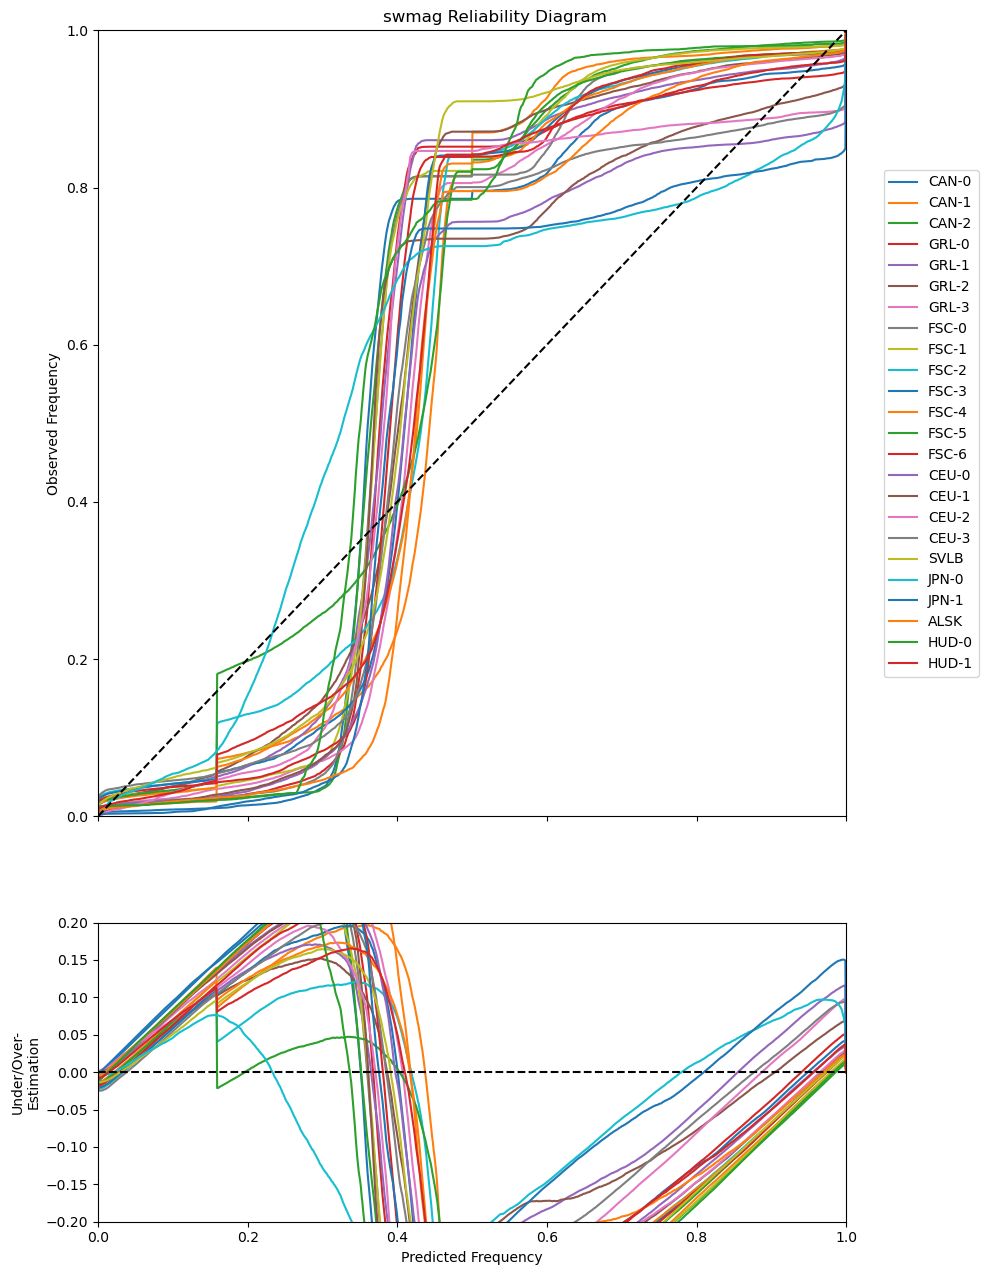

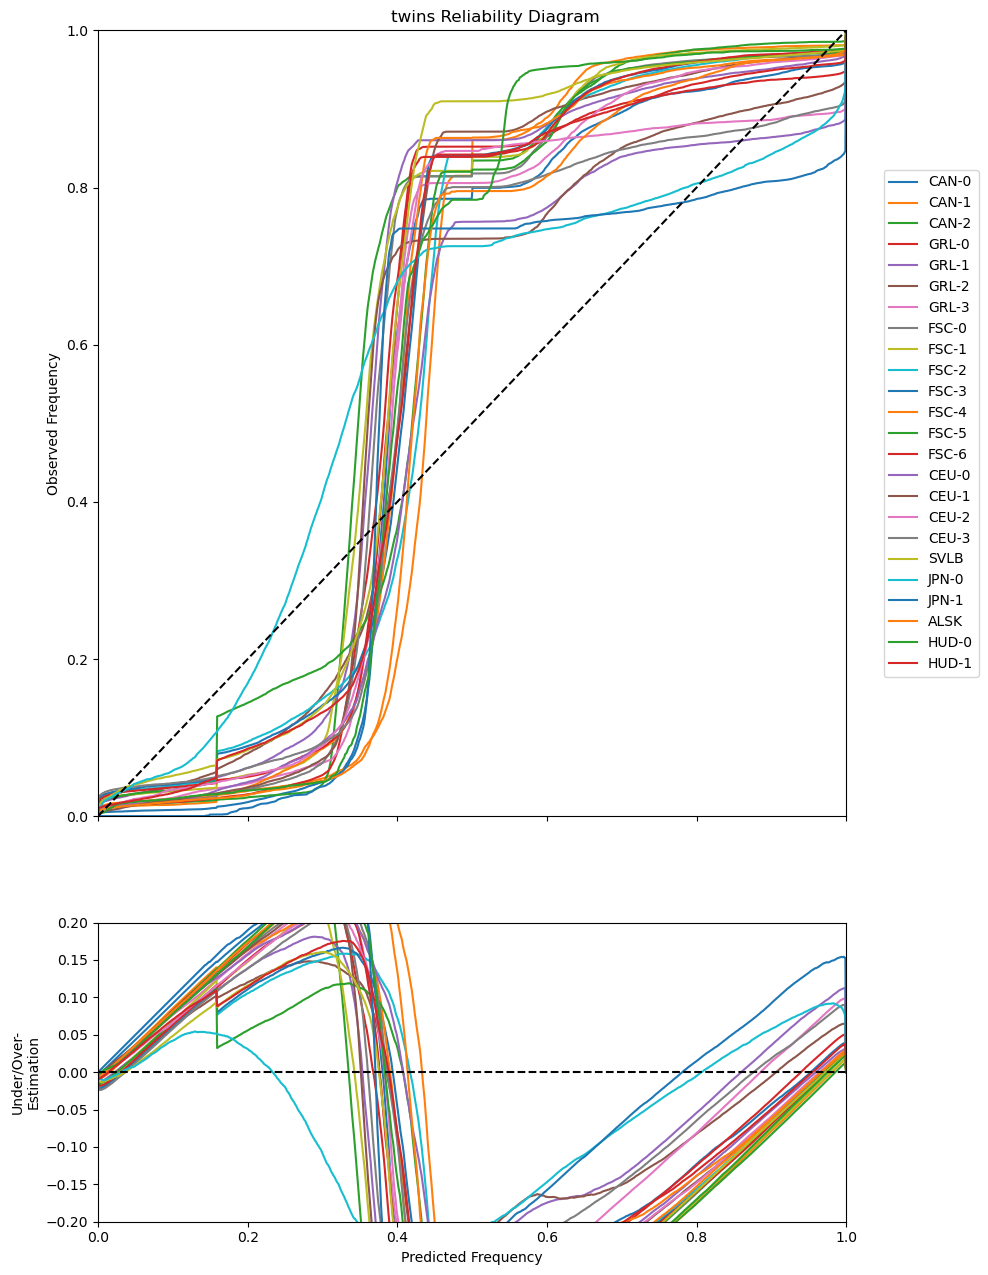

In [11]:
plotting_continuious_reliability_diagram(results, model='swmag')
plotting_continuious_reliability_diagram(results, model='twins')

In [12]:
scalers = {}
for cluster in cluster_dict.values():
	for key, region in cluster['regions'].items():
		scalers[key] = {}
		if key in list_of_oversampled_regions:
			if os.path.exists(f'{scaler_dir}/twins_{key}_twins_v_maxpooling_oversampling.pkl'):
				with open(f'{scaler_dir}/twins_{key}_twins_v_maxpooling_oversampling.pkl', 'rb') as f:
					scaler_values = pickle.load(f)
					scalers[key]['twins'] = scaler_values
			if os.path.exists(f'{scaler_dir}/swmag_{key}_swmag_v6-oversampling.pkl'):
				with open(f'{scaler_dir}/swmag_{key}_swmag_v6-oversampling.pkl', 'rb') as f:
					scaler_values = pickle.load(f)
					scalers[key]['swmag'] = scaler_values
					print(f'{key} scalers loaded')
		else:
			if os.path.exists(f'{scaler_dir}/twins_{key}_twins_v_maxpooling.pkl'):
				with open(f'{scaler_dir}/twins_{key}_twins_v_maxpooling.pkl', 'rb') as f:
					scaler_values = pickle.load(f)
					scalers[key]['twins'] = scaler_values
			if os.path.exists(f'{scaler_dir}/swmag_{key}_swmag_v6-1.pkl'):
				with open(f'{scaler_dir}/swmag_{key}_swmag_v6-1.pkl', 'rb') as f:
					scaler_values = pickle.load(f)
					scalers[key]['swmag'] = scaler_values
					print(f'{key} scalers loaded')

CAN-0 scalers loaded
CAN-1 scalers loaded
CAN-2 scalers loaded
GRL-0 scalers loaded
GRL-1 scalers loaded
GRL-2 scalers loaded
GRL-3 scalers loaded
FSC-0 scalers loaded
FSC-1 scalers loaded
FSC-2 scalers loaded
FSC-3 scalers loaded
FSC-4 scalers loaded
FSC-5 scalers loaded
FSC-6 scalers loaded
CEU-0 scalers loaded
CEU-1 scalers loaded
CEU-2 scalers loaded
CEU-3 scalers loaded
SVLB scalers loaded
JPN-0 scalers loaded
JPN-1 scalers loaded
ALSK scalers loaded
HUD-0 scalers loaded
HUD-1 scalers loaded


In [14]:
for cluster in cluster_dict.values():
	for key, region in cluster['regions'].items():
		if key in list_of_oversampled_regions:
			if os.path.exists(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-oversampling.pkl'):
				with open(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-oversampling.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['swmag_shap'] = shap_values
			# if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl'):
			# 	with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl', 'rb') as f:
			# 		shap_values = pickle.load(f)
			# 		cluster['regions'][key]['twins_shap'] = shap_values
		else:
			if os.path.exists(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-1.pkl'):
				with open(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-1.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['swmag_shap'] = shap_values
			# if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl'):
			# 	with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl', 'rb') as f:
			# 		shap_values = pickle.load(f)
			# 		cluster['regions'][key]['twins_shap'] = shap_values

In [15]:
# individual_cluster_to_examine = 'canadian_cluster'
feature_mean, feature_std, mean_shap, std_shap, X, mu, sigma, error = [], [], [], [], [], [], [], []
for cluster in cluster_dict.keys():
	for reg, region in cluster_dict[cluster]['regions'].items():
		if f'{model_type}_shap' in region.keys():

			region[f'{model_type}_shap']['mean_shap'] = np.concatenate([region[f'{model_type}_shap']['shap_values'][i][0][:,:,:,:] for i in range(len(region[f'{model_type}_shap']['shap_values']))], axis=0)
			region[f'{model_type}_shap']['std_shap'] = np.concatenate([region[f'{model_type}_shap']['shap_values'][i][1][:,:,:,:] for i in range(len(region[f'{model_type}_shap']['shap_values']))], axis=0)
			if reg in list_of_oversampled_regions:
				region[f'{model_type}_shap']['xtest'] = region['swmag_shap']['testing_data']
			else:
				region[f'{model_type}_shap']['xtest'] = region['swmag_shap']['xtest']


			for key in region[f'{model_type}_shap'].keys():
				if isinstance(region[f'{model_type}_shap'][key], torch.Tensor):
					region[f'{model_type}_shap'][key] = region[f'{model_type}_shap'][key].cpu().detach().numpy()
			region[f'{model_type}_shap']['mean_shap'] = region[f'{model_type}_shap']['mean_shap'].reshape(region[f'{model_type}_shap']['mean_shap'].shape[0], region[f'{model_type}_shap']['mean_shap'].shape[2], region[f'{model_type}_shap']['mean_shap'].shape[3])
			region[f'{model_type}_shap']['std_shap'] = region[f'{model_type}_shap']['std_shap'].reshape(region[f'{model_type}_shap']['std_shap'].shape[0], region[f'{model_type}_shap']['std_shap'].shape[2], region[f'{model_type}_shap']['std_shap'].shape[3])
			if region[f'{model_type}_shap']['xtest'].shape[1] < 3:
				region[f'{model_type}_shap']['xtest'] = region[f'{model_type}_shap']['xtest'].reshape(region[f'{model_type}_shap']['xtest'].shape[0], region[f'{model_type}_shap']['xtest'].shape[2], region[f'{model_type}_shap']['xtest'].shape[3])
			mean_added = np.sum(np.sum(np.abs(region[f'{model_type}_shap']['mean_shap']), axis=1),axis=1)
			region[f'{model_type}_shap']['mean_shap'] = region[f'{model_type}_shap']['mean_shap']/mean_added[:,None,None]

			std_added = np.sum(np.sum(np.abs(region[f'{model_type}_shap']['std_shap']), axis=1),axis=1)
			region[f'{model_type}_shap']['std_shap'] = region[f'{model_type}_shap']['std_shap']/std_added[:,None,None]

			region_scaler = scalers[reg][model_type]['swmag_scaler']

			unbroadcasted_mu = results[reg]['swmag_results']['predicted_mean'].to_numpy()
			unbroadcasted_sigma = results[reg]['swmag_results']['predicted_std'].to_numpy()
			unbroadcasted_error = np.array(np.abs(results[reg]['swmag_results']['predicted_mean'] - results[reg]['swmag_results']['actual']))

			concatenated_mu = np.concatenate([np.concatenate([unbroadcasted_mu[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)
			concatenated_sigma = np.concatenate([np.concatenate([unbroadcasted_sigma[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)
			concatenated_error = np.concatenate([np.concatenate([unbroadcasted_error[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)

			mu.append(np.concatenate(concatenated_mu, axis=0))
			sigma.append(np.concatenate(concatenated_sigma, axis=0))
			error.append(np.concatenate(concatenated_error, axis=0))

			feature_mean.append(np.sum(region[f'{model_type}_shap']['mean_shap'], axis=1))
			feature_std.append(np.sum(region[f'{model_type}_shap']['std_shap'], axis=1))
			mean_shap.append(np.concatenate(region[f'{model_type}_shap']['mean_shap'], axis=0))
			std_shap.append(np.concatenate(region[f'{model_type}_shap']['std_shap'], axis=0))

			X.append(region_scaler.inverse_transform(np.concatenate(region[f'{model_type}_shap']['xtest'], axis=0)))

mean_shap = np.concatenate(mean_shap, axis=0)
std_shap = np.concatenate(std_shap, axis=0)
print(feature_mean[0].shape)
# feature_mean = np.mean(np.abs(feature_mean), axis=0)
# feature_std = np.mean(np.abs(feature_std), axis=0)

# print(mean_shap.shape)
X = np.concatenate(X, axis=0)
mu = np.concatenate(mu, axis=0)
sigma = np.concatenate(sigma, axis=0)
error = np.concatenate(error, axis=0)

swmag_mean_shap_df = pd.DataFrame(mean_shap, columns=shap_values['features'])
swmag_std_shap_df = pd.DataFrame(std_shap, columns=shap_values['features'])
transformed_X_df = pd.DataFrame(X, columns=shap_values['features'])
mu_df = pd.DataFrame(mu, columns=shap_values['features'])
sigma_df = pd.DataFrame(sigma, columns=shap_values['features'])
error_df = pd.DataFrame(error, columns=shap_values['features'])

# print(swmag_mean_shap_df.shape)
# print(error_df.shape)

(20239, 14)


In [28]:
with open('cluster_dict.pkl', 'rb') as f:
	cluster_dict = pickle.load(f)

for cluster in cluster_dict.values():
	for region in cluster['regions'].values():
		region['mean_lat'] = utils.getting_mean_lat(region['stations'])

for cluster in cluster_dict.values():
	for key, region in cluster['regions'].items():
		if key in list_of_oversampled_regions:
			# if os.path.exists(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-oversampling.pkl'):
			# 	with open(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-oversampling.pkl', 'rb') as f:
			# 		shap_values = pickle.load(f)
			# 		cluster['regions'][key]['swmag_shap'] = shap_values
			if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl'):
				with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['twins_shap'] = shap_values
		else:
			# if os.path.exists(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-1.pkl'):
			# 	with open(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-1.pkl', 'rb') as f:
			# 		shap_values = pickle.load(f)
			# 		cluster['regions'][key]['swmag_shap'] = shap_values
			if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl'):
				with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['twins_shap'] = shap_values

Loading station NEW....
Loading station T19....
Loading station C10....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station MEA....
Loading station T36....
Loading station GHB....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station UMQ....
Loading station GHB....
Loading station FHB....
Loading station NAQ....
Loading station RVK....
Loading station LYC....
Loading station DON....
Loading station JCK....
Loading station HAN....
Loading station MEK....
Loading station OUJ....
Loading station NUR....
Loading station MAS....
Loading station NOR....
Loading station 

In [31]:
other_model = 'twins'

# individual_cluster_to_examine = 'canadian_cluster'
mean_shap, std_shap = [], []
dataframes_to_make = ['mean_shap_df']
twins_time_dict = {f'{feature}':{} for feature in shap_values['features']}

for feat in twins_time_dict.keys():
	for df in dataframes_to_make:
		twins_time_dict[feat][df] = pd.DataFrame()
for cluster in cluster_dict.keys():
	for reg, region in cluster_dict[cluster]['regions'].items():
		if f'{other_model}_shap' in region.keys():

			region[f'{other_model}_shap']['swmag_mean_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][0][0][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)
			# region[]
			for key in region[f'{other_model}_shap'].keys():
				if isinstance(region[f'{other_model}_shap'][key], torch.Tensor):
					region[f'{other_model}_shap'][key] = region[f'{other_model}_shap'][key].numpy()

			region[f'{other_model}_shap']['swmag_mean_shap'] = region[f'{other_model}_shap']['swmag_mean_shap'].reshape(region[f'{other_model}_shap']['swmag_mean_shap'].shape[0], region[f'{other_model}_shap']['swmag_mean_shap'].shape[2], region[f'{other_model}_shap']['swmag_mean_shap'].shape[3])

			mean_added = np.sum(np.sum(np.abs(region[f'{other_model}_shap']['swmag_mean_shap']), axis=1),axis=1)
			region[f'{other_model}_shap']['swmag_mean_shap'] = region[f'{other_model}_shap']['swmag_mean_shap']/mean_added[:,None,None]

			# mean_shap.append(np.concatenate(region[f'{model_type}_shap']['mean_shap'], axis=0))
			# std_shap.append(np.concatenate(region[f'{model_type}_shap']['std_shap'], axis=0))

			region[f'{other_model}_shap']['twins_mean_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][0][1][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)
			for key in region[f'{other_model}_shap'].keys():
				if isinstance(region[f'{other_model}_shap'][key], torch.Tensor):
					region[f'{other_model}_shap'][key] = region[f'{other_model}_shap'][key].numpy()

			region[f'{other_model}_shap']['twins_mean_shap'] = region[f'{other_model}_shap']['twins_mean_shap'].reshape(region[f'{other_model}_shap']['twins_mean_shap'].shape[0], region[f'{other_model}_shap']['twins_mean_shap'].shape[2], region[f'{other_model}_shap']['twins_mean_shap'].shape[3])

			mean_added = np.sum(np.sum(np.abs(region[f'{other_model}_shap']['twins_mean_shap']), axis=1),axis=1)
			region[f'{other_model}_shap']['twins_mean_shap'] = region[f'{other_model}_shap']['twins_mean_shap']/mean_added[:,None,None]




: 

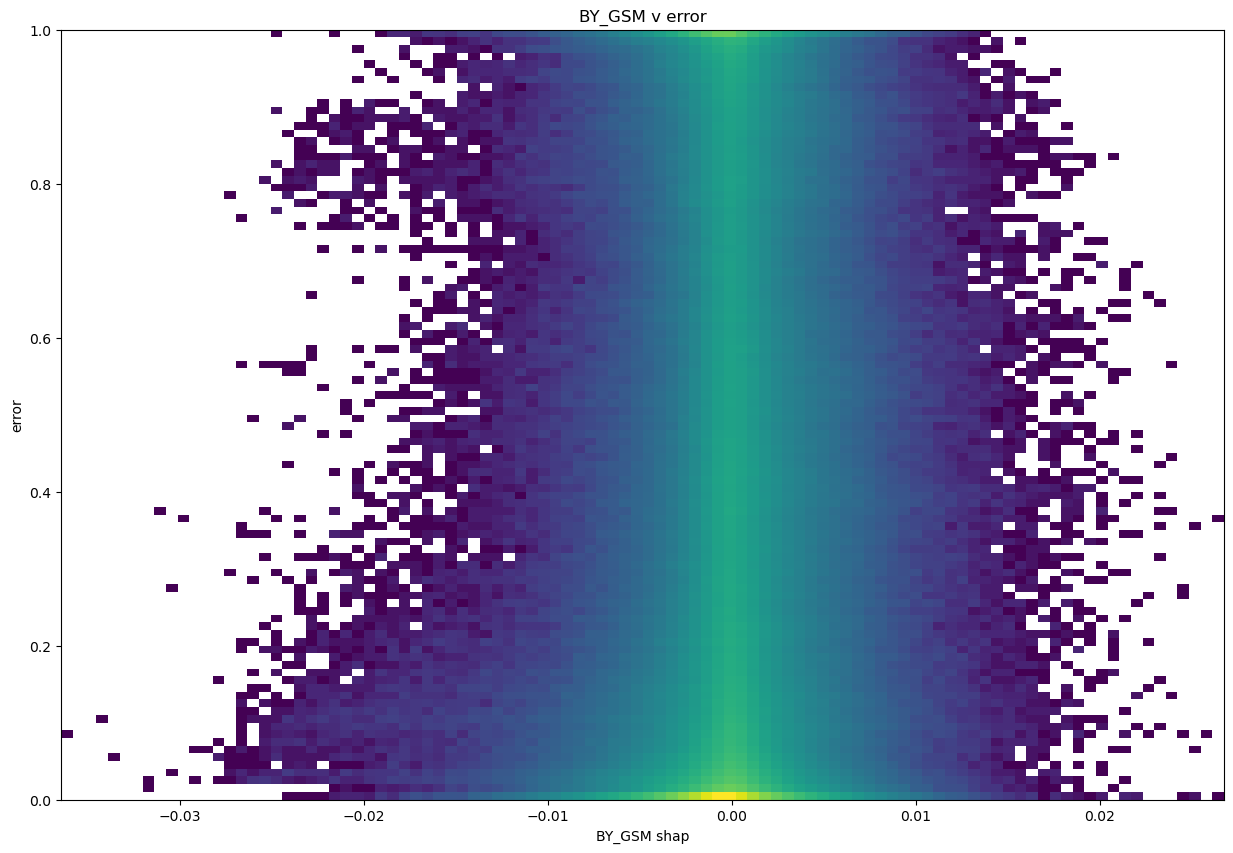

In [16]:
feature = ['BY_GSM']

fig, axes = plt.subplots(1, len(feature), figsize=(15, 10))
for i in range(len(feature)):
	axes.hist2d(swmag_mean_shap_df[feature[i]], error_df[feature[i]], bins=100, cmap='viridis', norm=mpl.colors.LogNorm())
	axes.set_title(f'{feature[i]} v error')
	axes.set_xlabel(f'{feature[i]} shap')
	axes.set_ylabel('error')
plt.savefig(f'plots/swmag_{feature[i]}_vs_error.png')

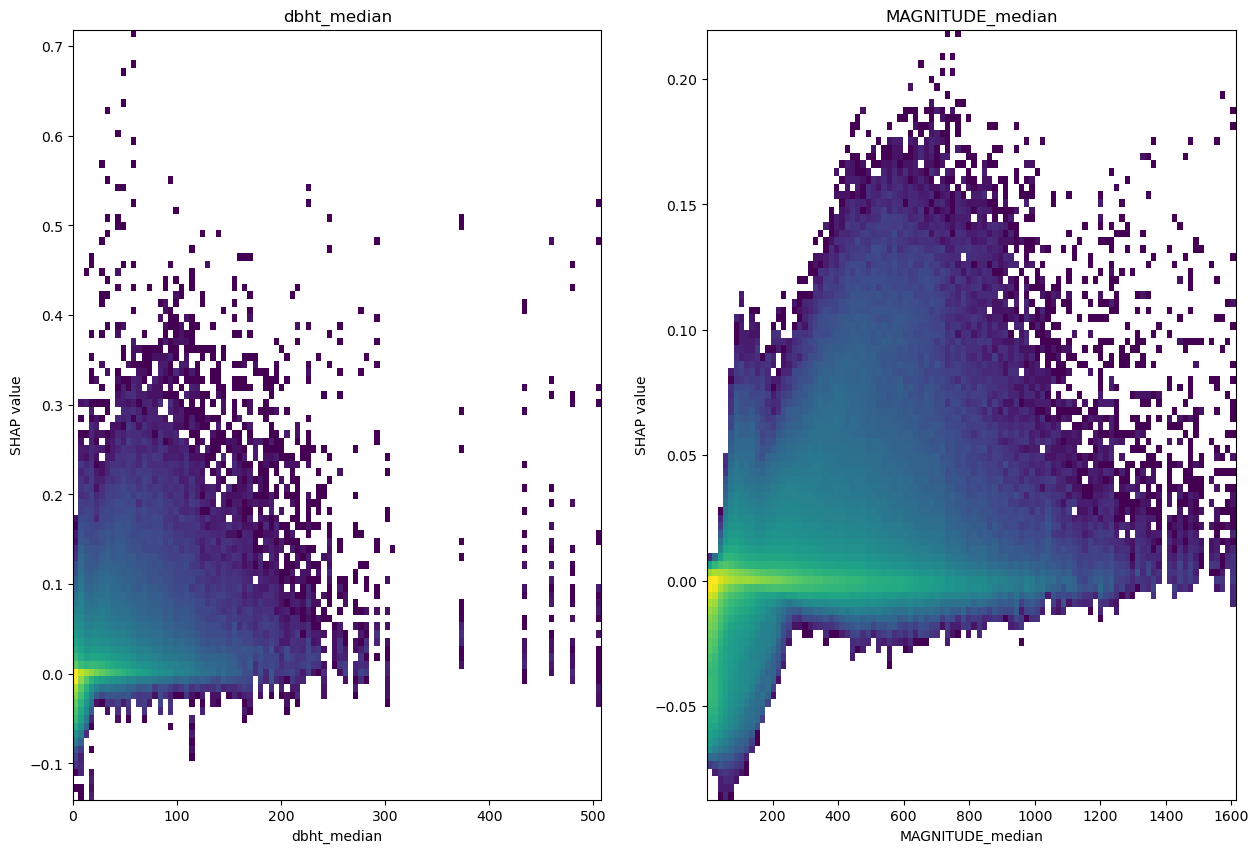

In [18]:
feature = ['dbht_median', 'MAGNITUDE_median']

fig, axes = plt.subplots(1, len(feature), figsize=(15, 10))
for i, ax in enumerate(axes):
	axes[i].hist2d(transformed_X_df[feature[i]], swmag_mean_shap_df[feature[i]], bins=100, cmap='viridis', norm=mpl.colors.LogNorm())
	ax.set_title(f'{feature[i]}')
	ax.set_xlabel(feature[i])
	ax.set_ylabel('SHAP value')
plt.savefig(f'plots/{feature[0]}_and_{feature[1]}')

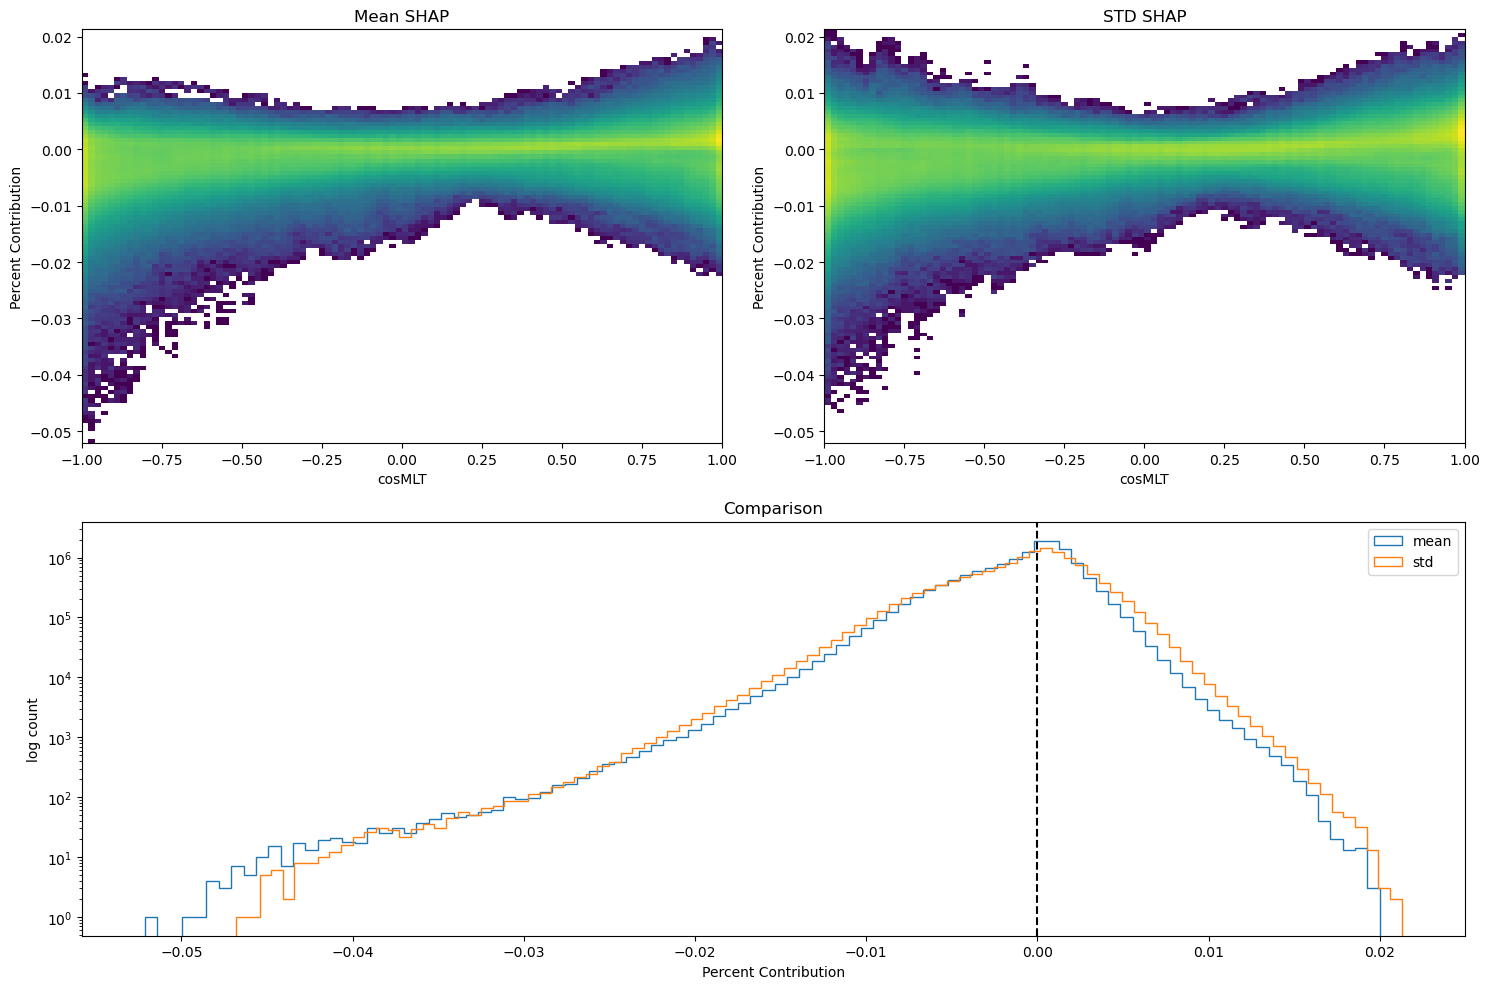

In [20]:
feature = 'cosMLT'

vmin = np.min([np.min(swmag_std_shap_df[feature]), np.min(swmag_mean_shap_df[feature])])
vmax = np.max([np.max(swmag_std_shap_df[feature]),np.max(swmag_mean_shap_df[feature])])

fig, axes = plt.subplot_mosaic("AB;DD", figsize=(15,10))
axes['A'].hist2d(transformed_X_df[feature], swmag_mean_shap_df[feature], bins=100, cmap='viridis', norm=mpl.colors.LogNorm())
axes['B'].hist2d(transformed_X_df[feature], swmag_std_shap_df[feature], bins=100, cmap='viridis', norm=mpl.colors.LogNorm())
plt.title(f'{feature}')
axes['A'].set_ylabel('Percent Contribution')
axes['A'].set_xlabel(feature)
axes['A'].set_xlim(np.min(transformed_X_df[feature]), np.max(transformed_X_df[feature]))
axes['A'].set_ylim(vmin, vmax)
axes['A'].set_title('Mean SHAP')

axes['B'].set_xlim(np.min(transformed_X_df[feature]), np.max(transformed_X_df[feature]))
axes['B'].set_ylim(vmin, vmax)
axes['B'].set_xlabel(feature)
axes['B'].set_ylabel('Percent Contribution')
axes['B'].set_title('STD SHAP')

axes['D'].set_title('Comparison')
axes['D'].hist(swmag_mean_shap_df[feature], bins=100, log=True, histtype='step', label='mean')
axes['D'].hist(swmag_std_shap_df[feature], bins=100, log=True, histtype='step', label='std')
axes['D'].set_ylabel('log count')
axes['D'].set_xlabel('Percent Contribution')
axes['D'].axvline(0, linestyle='--', color='k')
axes['D'].legend()

plt.tight_layout()
plt.savefig(f'plots/{feature}_swmag_shap_value_distributions.png')

# getting area under the curve of the 1D histograms
from sklearn.metrics import auc
mean_hist, mean_bins = np.histogram(swmag_mean_shap_df[feature], bins=100)
std_hist, std_bins = np.histogram(swmag_std_shap_df[feature], bins=100)
mean_area = auc(mean_bins[:-1], mean_hist)
std_area = auc(std_bins[:-1], std_hist)


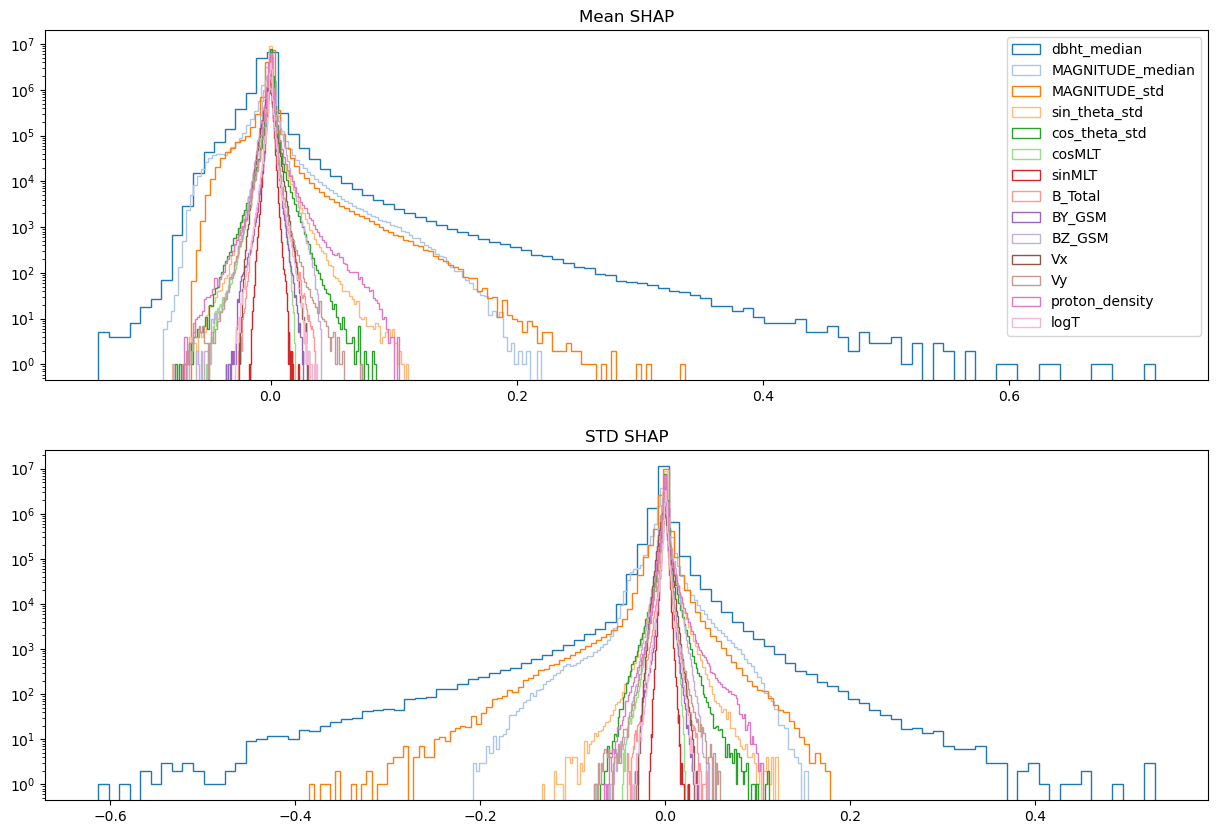

In [21]:
colors = sns.color_palette('tab20')

fig, axes = plt.subplots(2,1, figsize=(15,10))

for i, col in enumerate(shap_values['features']):
	axes[0].hist(swmag_mean_shap_df[col], bins=100, log=True, histtype='step', label=col, color=colors[i])
	axes[1].hist(swmag_std_shap_df[col], bins=100, log=True, histtype='step', label=col, color=colors[i])

axes[0].set_title('Mean SHAP')
axes[1].set_title('STD SHAP')

axes[0].legend()
plt.show()

In [22]:
# individual_cluster_to_examine = 'canadian_cluster'
mean_shap, std_shap, X, mu, sigma, error = [], [], [], [], [], []
dataframes_to_make = ['mean_shap_df', 'std_shap_df', 'transformed_X_df', 'mu_df', 'sigma_df', 'error_df']
time_dict = {f'{feature}':{} for feature in shap_values['features']}

for feat in time_dict.keys():
	for df in dataframes_to_make:
		time_dict[feat][df] = pd.DataFrame()
for cluster in cluster_dict.keys():
	for reg, region in cluster_dict[cluster]['regions'].items():
		if f'{model_type}_shap' in region.keys():

			region[f'{model_type}_shap']['mean_shap'] = np.concatenate([region[f'{model_type}_shap']['shap_values'][i][0][:,:,:,:] for i in range(len(region[f'{model_type}_shap']['shap_values']))], axis=0)
			region[f'{model_type}_shap']['std_shap'] = np.concatenate([region[f'{model_type}_shap']['shap_values'][i][1][:,:,:,:] for i in range(len(region[f'{model_type}_shap']['shap_values']))], axis=0)

			for key in region[f'{model_type}_shap'].keys():
				if isinstance(region[f'{model_type}_shap'][key], torch.Tensor):
					region[f'{model_type}_shap'][key] = region[f'{model_type}_shap'][key].cpu().detach().numpy()

			try:
				region[f'{model_type}_shap']['mean_shap'] = region[f'{model_type}_shap']['mean_shap'].reshape(region[f'{model_type}_shap']['mean_shap'].shape[0], region[f'{model_type}_shap']['mean_shap'].shape[2], region[f'{model_type}_shap']['mean_shap'].shape[3])
				region[f'{model_type}_shap']['std_shap'] = region[f'{model_type}_shap']['std_shap'].reshape(region[f'{model_type}_shap']['std_shap'].shape[0], region[f'{model_type}_shap']['std_shap'].shape[2], region[f'{model_type}_shap']['std_shap'].shape[3])
				region[f'{model_type}_shap']['xtest'] = region[f'{model_type}_shap']['xtest'].reshape(region[f'{model_type}_shap']['xtest'].shape[0], region[f'{model_type}_shap']['xtest'].shape[2], region[f'{model_type}_shap']['xtest'].shape[3])

				mean_added = np.sum(np.sum(np.abs(region[f'{model_type}_shap']['mean_shap']), axis=1),axis=1)
				region[f'{model_type}_shap']['mean_shap'] = region[f'{model_type}_shap']['mean_shap']/mean_added[:,None,None]

				std_added = np.sum(np.sum(np.abs(region[f'{model_type}_shap']['std_shap']), axis=1),axis=1)
				region[f'{model_type}_shap']['std_shap'] = region[f'{model_type}_shap']['std_shap']/std_added[:,None,None]

			except:
				# print('We already did this, skipping....')
				pass

			region_scaler = scalers[reg][model_type]['swmag_scaler']

			unbroadcasted_mu = results[reg]['swmag_results']['predicted_mean'].to_numpy()
			unbroadcasted_sigma = results[reg]['swmag_results']['predicted_std'].to_numpy()
			unbroadcasted_error = np.array(np.abs(results[reg]['swmag_results']['predicted_mean'] - results[reg]['swmag_results']['actual']))

			concatenated_mu = np.concatenate([np.concatenate([unbroadcasted_mu[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)
			concatenated_sigma = np.concatenate([np.concatenate([unbroadcasted_sigma[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)
			concatenated_error = np.concatenate([np.concatenate([unbroadcasted_error[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)

			for v, var in enumerate(time_dict.keys()):
				time_dict[var]['mean_shap_df'] = pd.concat([time_dict[var]['mean_shap_df'], pd.DataFrame(region[f'{model_type}_shap']['mean_shap'][:,:,v])], axis=0)
				time_dict[var]['std_shap_df'] = pd.concat([time_dict[var]['std_shap_df'], pd.DataFrame(region[f'{model_type}_shap']['std_shap'][:,:,v])], axis=0)
				time_dict[var]['transformed_X_df'] = pd.concat([time_dict[var]['transformed_X_df'], \
																pd.DataFrame(np.array([region_scaler.inverse_transform(region[f'{model_type}_shap']['xtest'][i,:,:]) \
																for i in range(region[f'{model_type}_shap']['xtest'].shape[0])])[:,:,v])], axis=0)
				time_dict[var]['mu_df'] = pd.concat([time_dict[var]['mu_df'], pd.DataFrame(concatenated_mu[:,:,v])], axis=0)
				time_dict[var]['sigma_df'] = pd.concat([time_dict[var]['sigma_df'], pd.DataFrame(concatenated_sigma[:,:,v])], axis=0)
				time_dict[var]['error_df'] = pd.concat([time_dict[var]['error_df'], pd.DataFrame(concatenated_error[:,:,v])], axis=0)

			# mu.append(np.concatenate(concatenated_mu, axis=0))
			# sigma.append(np.concatenate(concatenated_sigma, axis=0))
			# error.append(np.concatenate(concatenated_error, axis=0))

			# mean_shap.append(np.concatenate(region[f'{model_type}_shap']['mean_shap'], axis=0))
			# std_shap.append(np.concatenate(region[f'{model_type}_shap']['std_shap'], axis=0))
			# X.append(region_scaler.inverse_transform(np.concatenate(region[f'{model_type}_shap']['xtest'], axis=0)))

time_columns = [f't-{30-i}' for i in range(0,30)]
for var in time_dict.keys():
	for df in time_dict[var]:
		time_dict[var][df].columns = time_columns

# mean_shap = np.concatenate(mean_shap, axis=0)
# std_shap = np.concatenate(std_shap, axis=0)
# X = np.concatenate(X, axis=0)
# mu = np.concatenate(mu, axis=0)
# sigma = np.concatenate(sigma, axis=0)
# error = np.concatenate(error, axis=0)

# mean_shap_df = pd.DataFrame(mean_shap, columns=shap_values['features'])
# std_shap_df = pd.DataFrame(std_shap, columns=shap_values['features'])
# transformed_X_df = pd.DataFrame(X, columns=shap_values['features'])
# mu_df = pd.DataFrame(mu, columns=shap_values['features'])
# sigma_df = pd.DataFrame(sigma, columns=shap_values['features'])
# error_df = pd.DataFrame(error, columns=shap_values['features'])



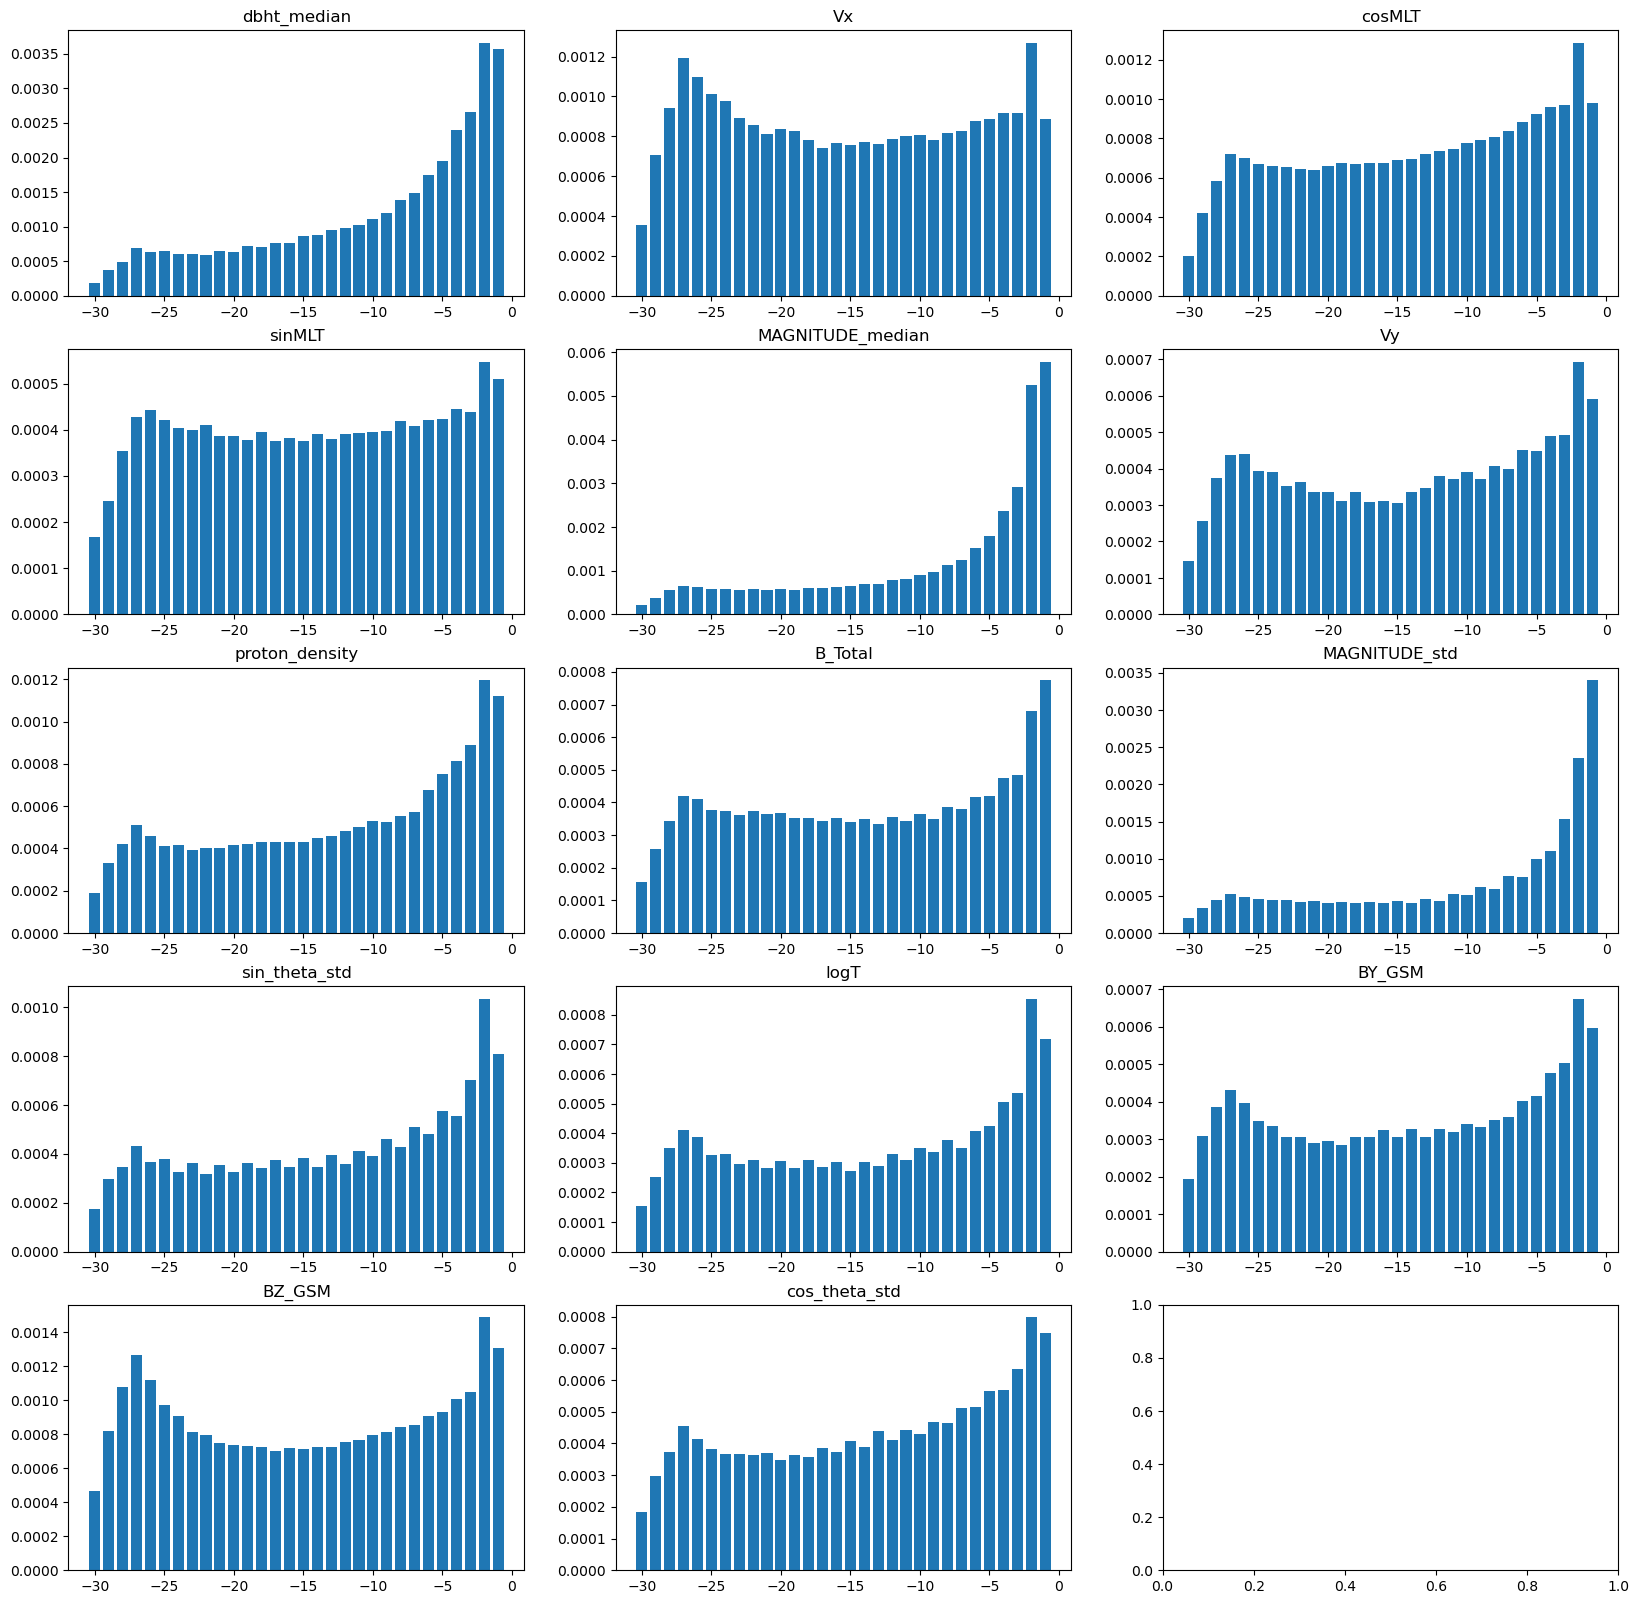

In [23]:
# var = 'BY_GSM'
df = 'std_shap_df'

fig, axes = plt.subplots(5, 3, figsize=(20,20))
for i, var in enumerate(time_dict.keys()):
	k = i%3
	j = i%5
	axes[j,k].bar([i-30 for i in range(0,30)], time_dict[var][df].abs().mean(axis=0))
	axes[j,k].set_title(var)
plt.savefig(f'plots/time_history_{df}.png')

In [24]:
for cluster in cluster_dict.values():
	for region in cluster['regions'].values():
		region['mean_lat'] = utils.getting_mean_lat(region['stations'])

Loading station NEW....
Loading station T19....
Loading station C10....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station MEA....
Loading station T36....
Loading station GHB....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station UMQ....
Loading station GHB....
Loading station FHB....
Loading station NAQ....
Loading station RVK....
Loading station LYC....
Loading station DON....
Loading station JCK....
Loading station HAN....
Loading station MEK....
Loading station OUJ....
Loading station NUR....
Loading station MAS....
Loading station NOR....
Loading station 

In [25]:
feature_list = cluster_dict['greenland_cluster']['regions']['GRL-0'][f'{model_type}_shap']['features'].tolist()
print(feature_list)
for_MI = []
lats = []
for cluster in cluster_dict.values():
	for name, region in cluster['regions'].items():
		if name == 'JPN-0':
			continue
		if f'{model_type}_shap' in region.keys():
			lats.append(region['mean_lat'])

plot_df = pd.DataFrame({'lats':lats})

for i, var in enumerate(feature_list):
	shaps = []

	for cluster in cluster_dict.values():
		for name, region in cluster['regions'].items():
			if name == 'JPN-0':
				continue
			if f'{model_type}_shap' in region.keys():
				region_shap_values = np.concatenate(region[f'{model_type}_shap']['mean_shap'], axis=0)[:, feature_list.index(var)]
				shaps.append(np.median(np.abs(region_shap_values)))

	plot_df[var] = shaps
swmag_plot_df = plot_df.sort_values(by='lats', inplace=False)

['dbht_median', 'MAGNITUDE_median', 'MAGNITUDE_std', 'sin_theta_std', 'cos_theta_std', 'cosMLT', 'sinMLT', 'B_Total', 'BY_GSM', 'BZ_GSM', 'Vx', 'Vy', 'proton_density', 'logT']


In [9]:
with open('cluster_dict.pkl', 'rb') as f:
	cluster_dict = pickle.load(f)

gc.collect()

# for cluster in cluster_dict.values():
# 	for region in cluster['regions'].values():
# 		region['mean_lat'] = utils.getting_mean_lat(region['stations'])

for cluster in cluster_dict.values():
	for key, region in cluster['regions'].items():
		if key in list_of_oversampled_regions:
			# if os.path.exists(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-oversampling.pkl'):
			# 	with open(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-oversampling.pkl', 'rb') as f:
			# 		shap_values = pickle.load(f)
			# 		cluster['regions'][key]['swmag_shap'] = shap_values
			if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl'):
				with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['twins_shap'] = shap_values
		else:
			# if os.path.exists(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-1.pkl'):
			# 	with open(f'{shap_dir}/{model_type}_region_{key}_swmag_v6-1.pkl', 'rb') as f:
			# 		shap_values = pickle.load(f)
			# 		cluster['regions'][key]['swmag_shap'] = shap_values
			if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl'):
				with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['twins_shap'] = shap_values

In [15]:
other_model = 'twins'

for cluster in cluster_dict.values():
	for region in cluster['regions'].values():
		region['mean_lat'] = utils.getting_mean_lat(region['stations'])

# individual_cluster_to_examine = 'canadian_cluster'
swmag_mean_shap_twins, swmag_std_shap_twins, twins_mean_shap, twins_std_shap = [], [], [], []
dataframes_to_make = ['mean_shap_df', 'std_shap_df', 'transformed_X_df', 'mu_df', 'sigma_df', 'error_df']
twins_time_dict = {f'{feature}':{} for feature in shap_values['features']}

def inverse_transform_twins(X, mean, std):
	return X*std + mean

for feat in twins_time_dict.keys():
	for df in dataframes_to_make:
		twins_time_dict[feat][df] = pd.DataFrame()
for cluster in cluster_dict.keys():
	for reg, region in cluster_dict[cluster]['regions'].items():
		if f'{other_model}_shap' in region.keys():

			region[f'{other_model}_shap']['swmag_mean_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][0][0][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)
			region[f'{other_model}_shap']['swmag_std_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][1][0][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)

			region[f'{other_model}_shap']['twins_mean_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][0][1][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)
			region[f'{other_model}_shap']['twins_std_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][1][1][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)

			for key in region[f'{other_model}_shap'].keys():
				if isinstance(region[f'{other_model}_shap'][key], torch.Tensor):
					region[f'{other_model}_shap'][key] = region[f'{other_model}_shap'][key].numpy()

			# try:
			region[f'{other_model}_shap']['swmag_mean_shap'] = region[f'{other_model}_shap']['swmag_mean_shap'].reshape(region[f'{other_model}_shap']['swmag_mean_shap'].shape[0], region[f'{other_model}_shap']['swmag_mean_shap'].shape[2], region[f'{other_model}_shap']['swmag_mean_shap'].shape[3])
			region[f'{other_model}_shap']['swmag_std_shap'] = region[f'{other_model}_shap']['swmag_std_shap'].reshape(region[f'{other_model}_shap']['swmag_std_shap'].shape[0], region[f'{other_model}_shap']['swmag_std_shap'].shape[2], region[f'{other_model}_shap']['swmag_std_shap'].shape[3])

			region[f'{other_model}_shap']['twins_mean_shap'] = region[f'{other_model}_shap']['twins_mean_shap'].reshape(region[f'{other_model}_shap']['twins_mean_shap'].shape[0], region[f'{other_model}_shap']['twins_mean_shap'].shape[2], region[f'{other_model}_shap']['twins_mean_shap'].shape[3])
			region[f'{other_model}_shap']['twins_std_shap'] = region[f'{other_model}_shap']['twins_std_shap'].reshape(region[f'{other_model}_shap']['twins_std_shap'].shape[0], region[f'{other_model}_shap']['twins_std_shap'].shape[2], region[f'{other_model}_shap']['twins_std_shap'].shape[3])

			mean_added = np.sum(np.sum(np.abs(region[f'{other_model}_shap']['swmag_mean_shap']), axis=1),axis=1) + np.sum(np.sum(np.abs(region[f'{other_model}_shap']['twins_mean_shap']), axis=1),axis=1)
			print(mean_added.shape)
			region[f'{other_model}_shap']['swmag_mean_shap'] = region[f'{other_model}_shap']['swmag_mean_shap']/mean_added[:,None,None]
			region[f'{other_model}_shap']['twins_mean_shap'] = region[f'{other_model}_shap']['twins_mean_shap']/mean_added[:,None,None]

			std_added = np.sum(np.sum(np.abs(region[f'{other_model}_shap']['swmag_std_shap']), axis=1),axis=1) + np.sum(np.sum(np.abs(region[f'{other_model}_shap']['twins_std_shap']), axis=1),axis=1)
			region[f'{other_model}_shap']['swmag_std_shap'] = region[f'{other_model}_shap']['swmag_std_shap']/std_added[:,None,None]
			region[f'{other_model}_shap']['twins_std_shap'] = region[f'{other_model}_shap']['twins_std_shap']/std_added[:,None,None]

			swmag_mean_shap_twins.append(np.sum(region[f'{other_model}_shap']['swmag_mean_shap'], axis=1))
			swmag_std_shap_twins.append(np.sum(region[f'{other_model}_shap']['swmag_std_shap'], axis=1))

			twins_mean_shap.append(np.sum(np.sum(region[f'{other_model}_shap']['twins_mean_shap'], axis=1), axis=1))
			twins_std_shap.append(np.sum(np.sum(region[f'{other_model}_shap']['twins_std_shap'], axis=1), axis=1))

			# del region[f'{other_model}_shap']['swmag_mean_shap'], region[f'{other_model}_shap']['swmag_std_shap'], region[f'{other_model}_shap']['twins_mean_shap'], region[f'{other_model}_shap']['twins_std_shap']
			# gc.collect()


swmag_mean_shap_twins = np.concatenate(swmag_mean_shap_twins, axis=0)
swmag_std_shap_twins = np.concatenate(swmag_std_shap_twins, axis=0)

twins_mean_shap = np.concatenate(twins_mean_shap, axis=0)
twins_std_shap = np.concatenate(twins_std_shap, axis=0)

swmag_mean_shap_twins = np.mean(np.abs(swmag_mean_shap_twins), axis=0)
swmag_std_shap_twins = np.mean(np.abs(swmag_std_shap_twins), axis=0)

twins_mean_shap = np.mean(np.abs(twins_mean_shap), axis=0)
twins_std_shap = np.mean(np.abs(twins_std_shap), axis=0)

print(swmag_mean_shap_twins.shape)
print(twins_mean_shap.shape)

# raise

# twins_mean_shap_df = pd.DataFrame(swmag_mean_shap_twins, columns=shap_values['features'])
# twins_std_shap_df = pd.DataFrame(swmag_std_shap_twins, columns=shap_values['features'])



Loading station NEW....
Loading station T19....
Loading station C10....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station LET....
Loading station T03....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station T43....
Loading station RED....
Loading station C06....
Loading station MEA....
Loading station T36....
Loading station GHB....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station UMQ....
Loading station GHB....
Loading station FHB....
Loading station NAQ....
Loading station RVK....
Loading station LYC....
Loading station DON....
Loading station JCK....
Loading station HAN....
Loading station MEK....
Loading station OUJ....
Loading station NUR....
Loading station MAS....
Loading station NOR....
Loading station 

: 

['dbht_median', 'MAGNITUDE_median', 'MAGNITUDE_std', 'sin_theta_std', 'cos_theta_std', 'cosMLT', 'sinMLT', 'B_Total', 'BY_GSM', 'BZ_GSM', 'Vx', 'Vy', 'proton_density', 'logT', 'Ion Temp']


NameError: name 'swmag_mean_shap_twins' is not defined

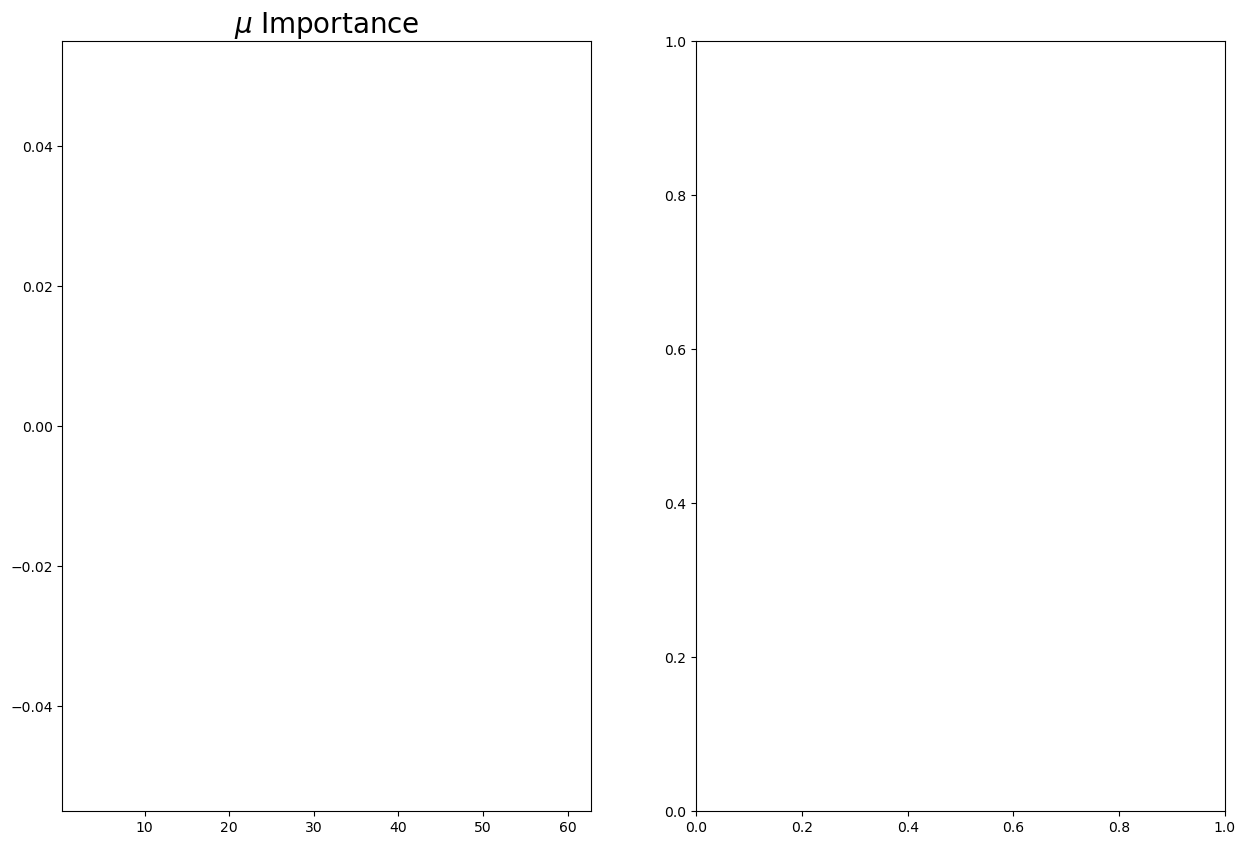

In [26]:
fig, axes = plt.subplots(1,2,figsize=(15, 10))
x = [(i+1)*4 for i in range(15)]
x_swmag = [j-0.5 for j in x]
x_twins = [k+0.5 for k in x]
labels = shap_values['features'].tolist() + ['Ion Temp']

print(labels)

axes[0].set_title(r'$\mu$ Importance', fontsize=20)
axes[0].bar(x_swmag, np.concatenate([mean_shap, np.zeros(1)], axis=0), label='SWMAG', color='blue')
axes[0].bar(x_twins, np.concatenate([swmag_mean_shap_twins, np.array(twins_mean_shap).reshape(1)], axis=0), label='TWINS', color='orange')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=75)
axes[0].set_ylabel('SHAP Importance', fontsize=20)
axes[0].legend()

axes[1].set_title(r'$\sigma$ Importance', fontsize=20)
axes[1].bar(x_swmag, np.concatenate([std_shap, np.zeros(1)], axis=0), label='SWMAG', color='blue')
axes[1].bar(x_twins, np.concatenate([swmag_std_shap_twins, np.array(twins_std_shap).reshape(1)], axis=0), label='TWINS', color='orange')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels, rotation=75)

plt.tight_layout()
plt.savefig('plots/GEM_2024_plots/mean_feature_importance.png')

In [27]:
model_type = 'twins'
feature_list = cluster_dict['greenland_cluster']['regions']['GRL-0'][f'{model_type}_shap']['features'].tolist()
print(feature_list)
for_MI = []
lats = []
for cluster in cluster_dict.values():
	for name, region in cluster['regions'].items():
		if name == 'JPN-0':
			continue
		if f'{model_type}_shap' in region.keys():
			lats.append(region['mean_lat'])

plot_df = pd.DataFrame({'lats':lats})

for i, var in enumerate(feature_list):
	shaps = []

	for cluster in cluster_dict.values():
		for name, region in cluster['regions'].items():
			if name == 'JPN-0':
				continue
			if f'{model_type}_shap' in region.keys():
				region_shap_values = np.concatenate(region[f'{model_type}_shap']['swmag_mean_shap'], axis=0)[:, feature_list.index(var)]
				shaps.append(np.median(np.abs(region_shap_values)))

	plot_df[var] = shaps
twins_shaps = []
for cluster in cluster_dict.values():
	for name, region in cluster['regions'].items():
		if name == 'JPN-0':
			continue
		if f'{model_type}_shap' in region.keys():
			region_shap_values = np.concatenate(np.concatenate(region[f'{model_type}_shap']['twins_mean_shap'], axis=0), axis=0)
			twins_shaps.append(np.median(np.abs(region_shap_values)))
plot_df['twins'] = twins_shaps

twins_plot_df = plot_df.sort_values(by='lats', inplace=False)

KeyError: 'twins_shap'

[0, 0] - dbht_median


NameError: name 'twins_plot_df' is not defined

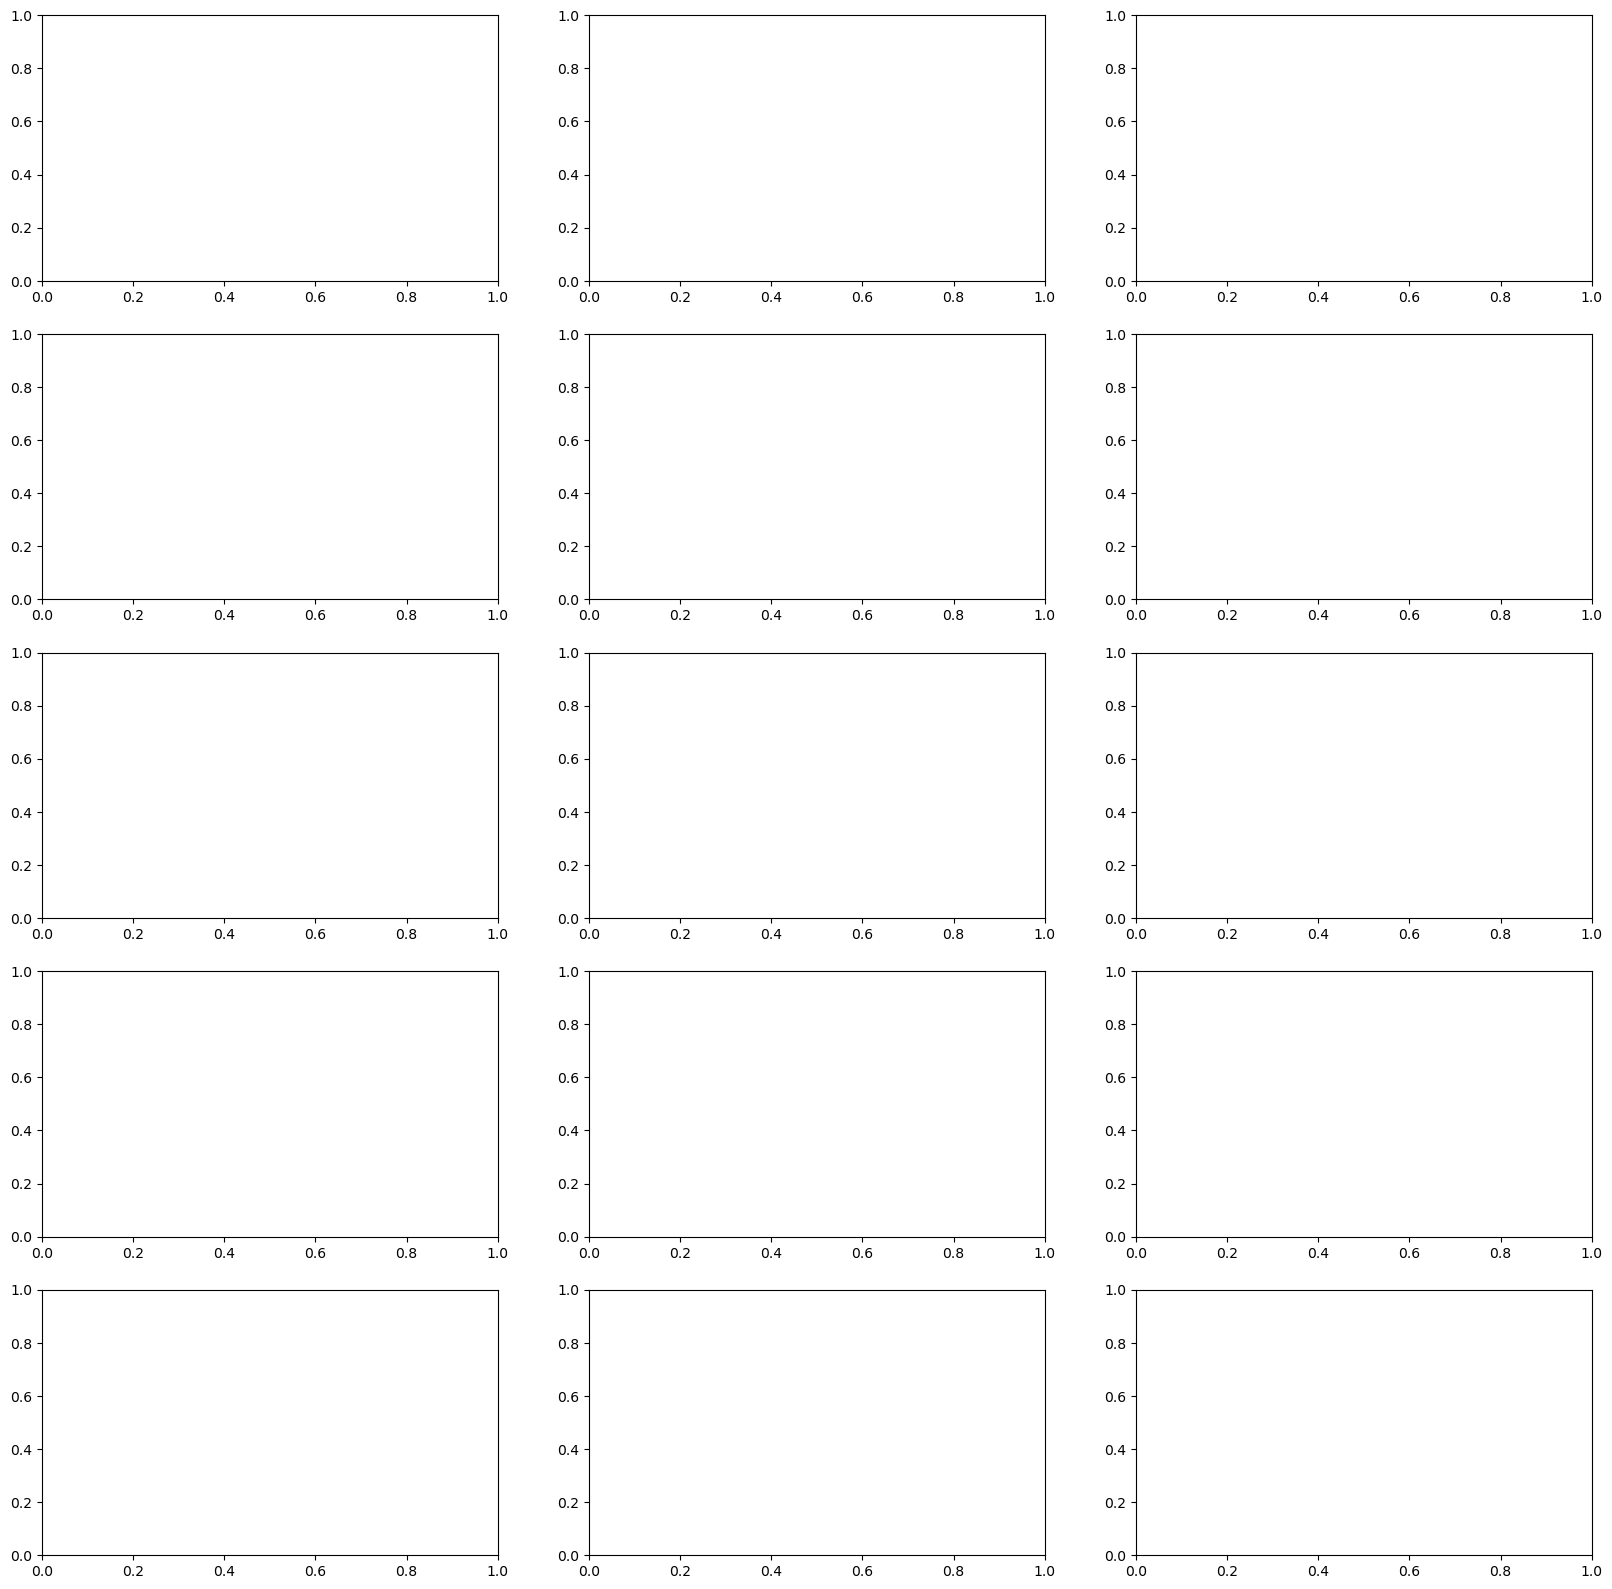

In [ ]:
fig, axes = plt.subplots(5,3, figsize=(20,20))
for i, var in enumerate(feature_list):
	j = i//3
	k = i%3
	print(f'{[j,k]} - {var}')

	swmag_z = np.polyfit(swmag_plot_df['lats'], swmag_plot_df[var], 4)
	swmag_p = np.poly1d(swmag_z)

	twins_z = np.polyfit(twins_plot_df['lats'], twins_plot_df[var], 4)
	twins_p = np.poly1d(twins_z)

	axes[j,k].plot(swmag_plot_df['lats'], swmag_p(swmag_plot_df['lats']), color='blue', label='swmag')
	axes[j,k].scatter(swmag_plot_df['lats'], swmag_plot_df[var], color='blue')

	axes[j,k].plot(twins_plot_df['lats'], twins_p(twins_plot_df['lats']), color='orange', label='twins')
	axes[j,k].scatter(twins_plot_df['lats'], twins_plot_df[var], color='orange')

	# axes[j,k].set_ylabel('Mean SHAP Value')
	axes[j,k].set_title(f'{var}')
	axes[j,k].legend()


twins_z = np.polyfit(twins_plot_df['lats'], twins_plot_df['twins'], 4)
twins_p = np.poly1d(twins_z)
axes[4,2].plot(twins_plot_df['lats'], twins_p(twins_plot_df['lats']), color='orange', label='twins')
axes[4,2].scatter(twins_plot_df['lats'], twins_plot_df['twins'], color='orange')
axes[4,2].legend()
for i in range(axes.shape[0]):
	axes[i,0].set_ylabel('Mean SHAP Value', fontsize=14)
for i in range(axes.shape[1]):
	axes[4,i].set_xlabel('Mean Latitude', fontsize=14)
axes[4,2].set_title(f'Ion Temp', fontsize=14)
plt.savefig('plots/GEM_2024_plots/median_shap_vs_mlat.png')

In [27]:
plotting_df = pd.DataFrame()
mlt_arr, actual_arr, mlat_arr = [], [], []
for cluster in cluster_dict.keys():
	for reg, region in cluster_dict[cluster]['regions'].items():

		df = utils.loading_supermag(region['mlt_station'])
		dates = region['swmag_shap']['Date_UTC']

		cluster_dict[cluster]['regions'][reg]['test_mlt'] = df[df.index.isin(dates['Date_UTC'])]['MLT']
		if 'dates' in results[reg]['swmag_results'].keys():
			results[reg]['swmag_results'].set_index('dates', inplace=True)
		results[reg]['swmag_results']['MLT'] = cluster_dict[cluster]['regions'][reg]['test_mlt']
		results[reg]['swmag_results']['error'] = np.abs(results[reg]['swmag_results']['predicted_mean'] - results[reg]['swmag_results']['actual'])
		results[reg]['swmag_results']['mlat'] = cluster_dict[cluster]['regions'][reg]['mean_lat']
		plotting_df = pd.concat([plotting_df, results[reg]['swmag_results']], axis=0)

		unbroadcasted_mlt = results[reg]['swmag_results']['MLT'].to_numpy()
		unbroadcasted_actual = results[reg]['swmag_results']['actual'].to_numpy()
		unbroadcasted_mlat = results[reg]['swmag_results']['mlat'].to_numpy()

		concatenated_mlt = np.concatenate([np.concatenate([unbroadcasted_mlt[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)
		concatenated_actual = np.concatenate([np.concatenate([unbroadcasted_actual[:,np.newaxis]]*30, axis=1)[:,:,np.newaxis]]*14, axis=2)

		# mlt_arr.append(np.concatenate(concatenated_mlt, axis=0))
		# actual_arr.append(np.concatenate(concatenated_actual, axis=0))

		mlt_arr.append(np.repeat(results[reg]['swmag_results']['MLT'].to_numpy(), 30))
		actual_arr.append(np.repeat(results[reg]['swmag_results']['actual'].to_numpy(), 30))
		mlat_arr.append(np.repeat(results[reg]['swmag_results']['mlat'].to_numpy(), 30))

mlt_arr = np.concatenate(mlt_arr, axis=0)
actual_arr = np.concatenate(actual_arr, axis=0)
mlat_arr = np.concatenate(mlat_arr, axis=0)
time_history = np.concatenate((np.array([30-i for i in range(0,30)]),)*(len(mlt_arr)//30), axis=0)

# mlt_df = pd.DataFrame(mlt_arr, columns=shap_values['features'])
# actual_df = pd.DataFrame(actual_arr, columns=shap_values['features'])

plotting_mlt_mlat_shap_mean = mean_shap_df.copy()
plotting_mlt_mlat_shap_mean['MLT'] = mlt_arr
plotting_mlt_mlat_shap_mean['mlat'] = mlat_arr
plotting_mlt_mlat_shap_mean['actual'] = actual_arr
plotting_mlt_mlat_shap_mean['time_history'] = time_history


Loading station NEW....
Loading station LET....
Loading station MEA....
Loading station STF....
Loading station GDH....
Loading station GDH....
Loading station NAQ....
Loading station LYC....
Loading station NUR....
Loading station ABK....
Loading station ABK....
Loading station ABK....
Loading station ABK....
Loading station ABK....
Loading station BEL....
Loading station BEL....
Loading station HRB....
Loading station WNG....
Loading station HRN....
Loading station KNY....
Loading station MMB....
Loading station CMO....
Loading station PIN....
Loading station BLC....


In [28]:
temp = plotting_df[(plotting_df['mlat']>60) & (plotting_df['mlat']<62)]
temp = temp[(temp['MLT']>=17) & (temp['MLT']<=18)]

print(len(temp))
print(len(plotting_df))

1232
461031


                     predicted_mean  predicted_std  actual   MLT  \
dates                                                              
2010-05-28 00:40:00    3.625096e-07   8.585448e-07     0.0  16.0   
2010-05-28 00:41:00    3.485004e-07   8.329844e-07     0.0  16.0   
2010-05-28 00:42:00    3.419244e-07   8.278013e-07     0.0  16.0   
2010-05-28 00:43:00    3.409632e-07   8.345883e-07     0.0  16.0   
2010-05-28 00:44:00    3.502674e-07   8.607846e-07     0.0  16.0   
...                             ...            ...     ...   ...   
2017-05-27 23:53:00    6.848950e-01   4.021236e-01     0.0  17.0   
2017-05-27 23:54:00    7.015805e-01   3.936577e-01     0.0  17.0   
2017-05-27 23:55:00    6.787452e-01   4.046462e-01     0.0  17.0   
2017-05-27 23:56:00    7.460163e-01   3.685822e-01     0.0  17.0   
2017-05-27 23:57:00    7.067727e-01   3.856558e-01     0.0  17.0   

                            error  mlat  
dates                                    
2010-05-28 00:40:00  3.625096e-

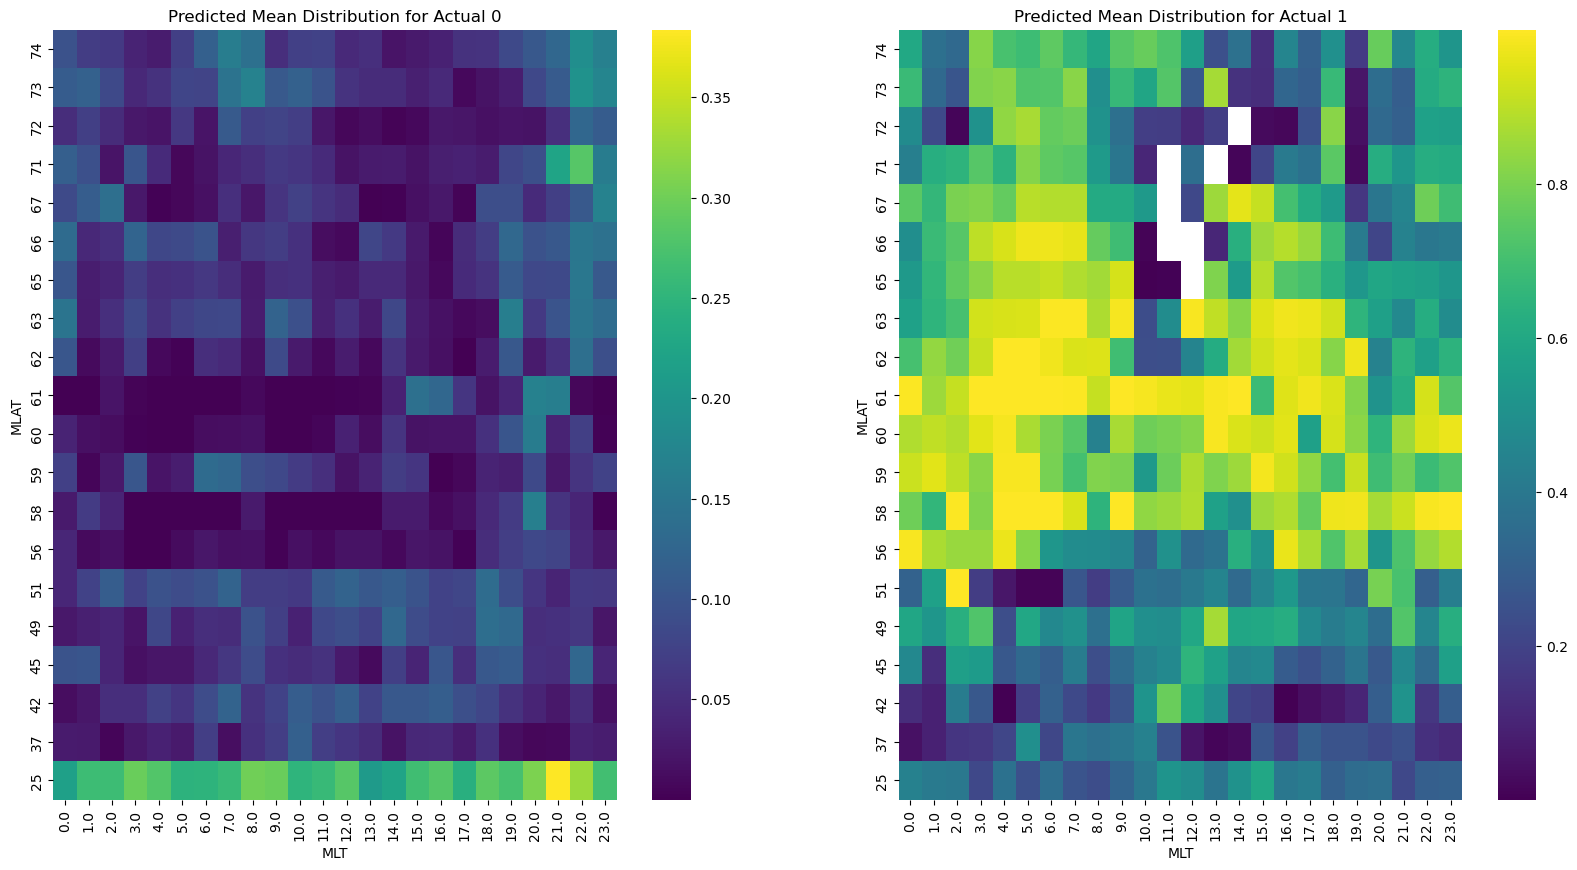

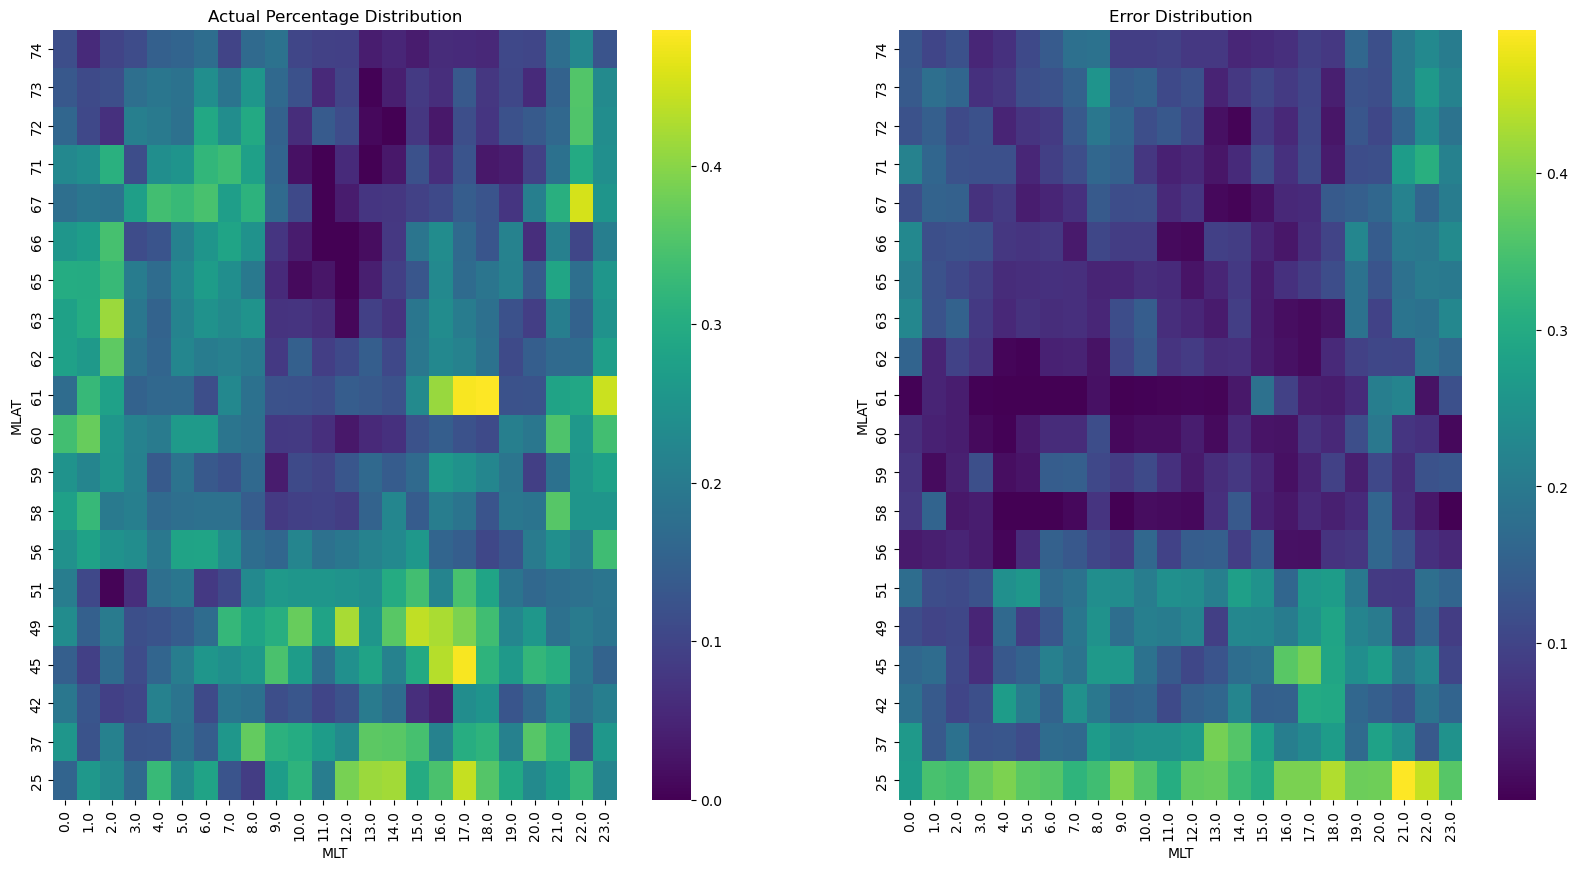

In [29]:
plotting_df['MLT'] = plotting_df['MLT'].round(0)
plotting_df['mlat'] = plotting_df['mlat'].astype(int)
plotting_df['MLT'].replace({24:0}, inplace=True)

actual_0_plotting_df = plotting_df[plotting_df['actual']==0]
actual_1_plotting_df = plotting_df[plotting_df['actual']==1]
print(actual_0_plotting_df)

pivot_table_0 = actual_0_plotting_df.pivot_table(index='mlat', columns='MLT', values='predicted_mean', aggfunc='mean')
pivot_table_1 = actual_1_plotting_df.pivot_table(index='mlat', columns='MLT', values='predicted_mean', aggfunc='mean')
perc_table = plotting_df.pivot_table(index='mlat', columns='MLT', values='actual', aggfunc='mean')
error_table = plotting_df.pivot_table(index='mlat', columns='MLT', values='error', aggfunc='mean')
print(pivot_table_0)
fig, axes = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(pivot_table_0, ax=axes[0], cmap='viridis')
# inverting the y axis to make it look like a real MLAT plot
axes[0].invert_yaxis()
axes[0].set_title('Predicted Mean Distribution for Actual 0')
axes[0].set_xlabel('MLT')
axes[0].set_ylabel('MLAT')

sns.heatmap(pivot_table_1, ax=axes[1], cmap='viridis')
axes[1].invert_yaxis()
axes[1].set_title('Predicted Mean Distribution for Actual 1')
axes[1].set_xlabel('MLT')
axes[1].set_ylabel('MLAT')

plt.show()

fig, axes = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(perc_table, ax=axes[0], cmap='viridis')
axes[0].invert_yaxis()
axes[0].set_title('Actual Percentage Distribution')
axes[0].set_xlabel('MLT')
axes[0].set_ylabel('MLAT')

sns.heatmap(error_table, ax=axes[1], cmap='viridis')
axes[1].invert_yaxis()
axes[1].set_title('Error Distribution')
axes[1].set_xlabel('MLT')
axes[1].set_ylabel('MLAT')

plt.show()

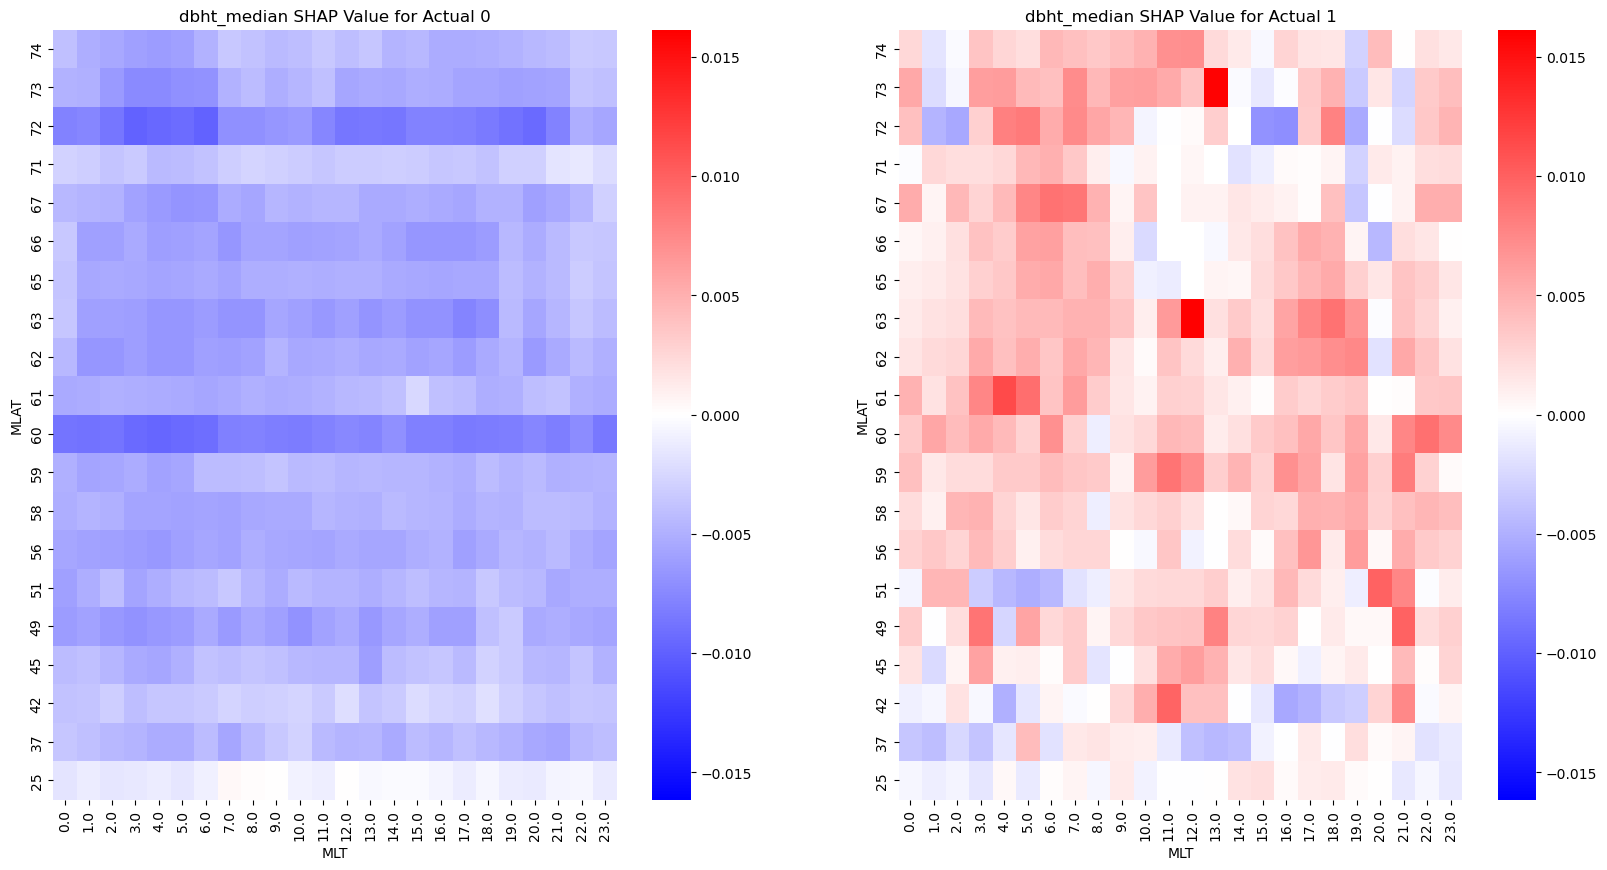

In [30]:
var = 'dbht_median'

mlt_mlat_plotting_df = plotting_mlt_mlat_shap_mean.copy()
mlt_mlat_plotting_df['MLT'] = mlt_mlat_plotting_df['MLT'].round(0)
mlt_mlat_plotting_df['mlat'] = mlt_mlat_plotting_df['mlat'].astype(int)
mlt_mlat_plotting_df['MLT'].replace({24:0}, inplace=True)

actual_0_plotting_df = mlt_mlat_plotting_df[mlt_mlat_plotting_df['actual']==0]
actual_1_plotting_df = mlt_mlat_plotting_df[mlt_mlat_plotting_df['actual']==1]

pivot_table_0 = actual_0_plotting_df.pivot_table(index='mlat', columns='MLT', values=var, aggfunc='mean')
pivot_table_1 = actual_1_plotting_df.pivot_table(index='mlat', columns='MLT', values=var, aggfunc='mean')

vmax = np.max([np.nanmax(pivot_table_0.values), np.nanmax(pivot_table_1.values)])
vmin = np.min([np.nanmin(pivot_table_0.values), np.nanmin(pivot_table_1.values)])

vlim = np.max([np.abs(vmin), np.abs(vmax)])

fig, axes = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(pivot_table_0, ax=axes[0], cmap='bwr', vmin=-vlim, vmax=vlim)
# inverting the y axis to make it look like a real MLAT plot
axes[0].invert_yaxis()
axes[0].set_title(f'{var} SHAP Value for Actual 0')
axes[0].set_xlabel('MLT')
axes[0].set_ylabel('MLAT')

sns.heatmap(pivot_table_1, ax=axes[1], cmap='bwr', vmin=-vlim, vmax=vlim)
axes[1].invert_yaxis()
axes[1].set_title(f'{var} SHAP Value for Actual 1')
axes[1].set_xlabel('MLT')
axes[1].set_ylabel('MLAT')

plt.show()


In [31]:
specific_mlat = 61
specific_mlt = 18
absolute = True
aggregation_method = 'mean'
time_history = True
cut_mlt = False
if not cut_mlt:
	round_mlt = True
else:
	round_mlt = False
mlt_cuts = 1000
mlt_bins = np.linspace(0,24,mlt_cuts+1).tolist()
specific_plotting_df = plotting_mlt_mlat_shap_mean.copy()
specific_plotting_df['mlat'] = specific_plotting_df['mlat'].astype(int)

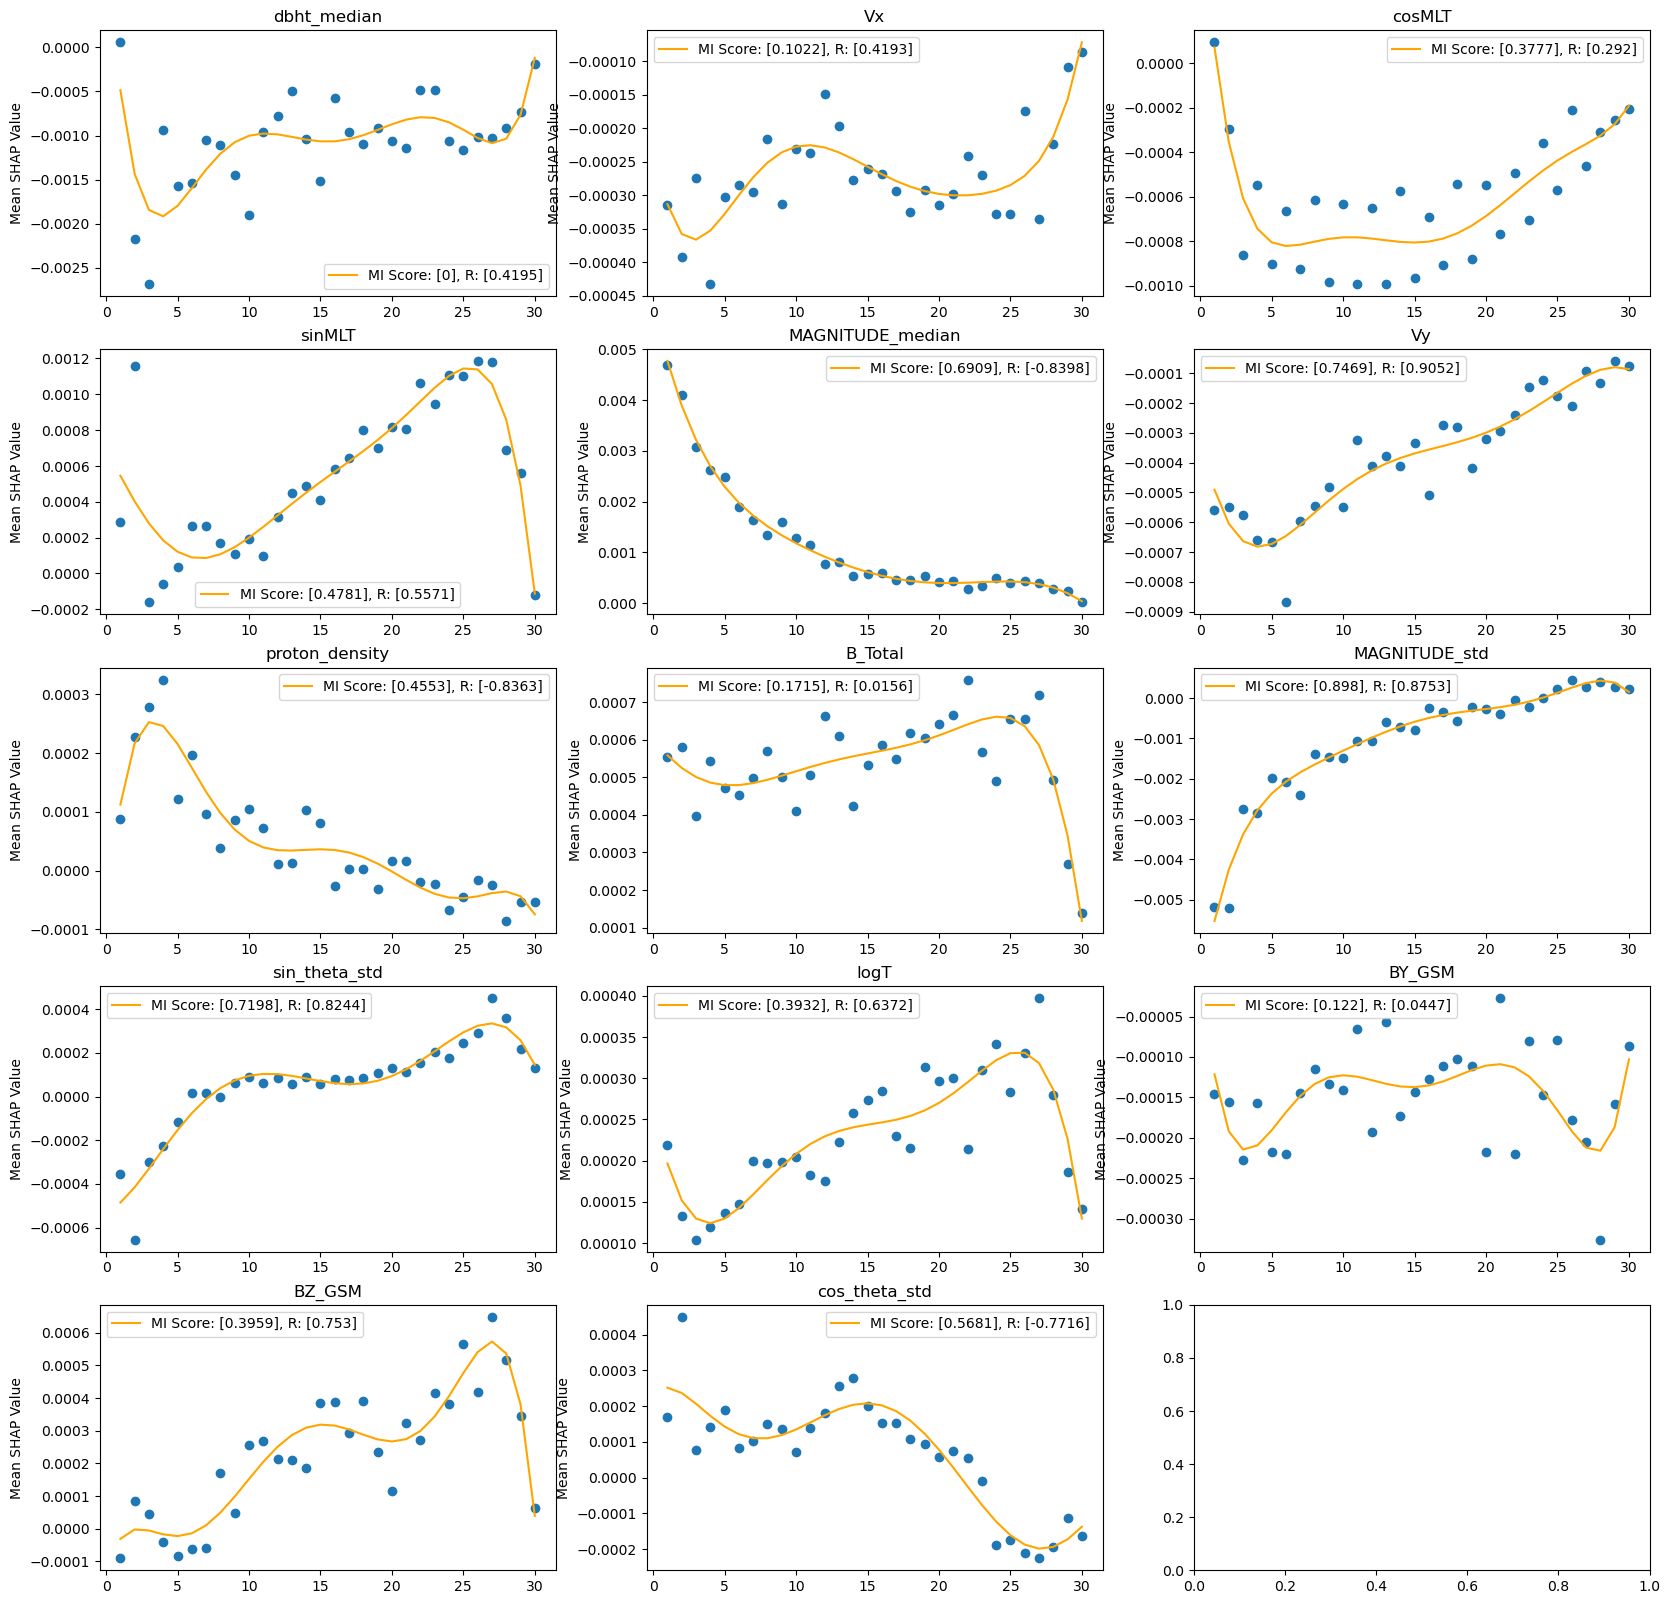

: 

In [32]:
title = f'{aggregation_method}_shap_'

if round_mlt:
	specific_plotting_df['MLT'] = specific_plotting_df['MLT'].round(0)
elif cut_mlt:
	specific_plotting_df['MLT_bins'] = pd.cut(specific_plotting_df['MLT'], mlt_bins, labels=mlt_bins[:-1], include_lowest=True)
	# specific_plotting_df = specific_plotting_df.groupby('MLT_bins').agg(aggregation_method)
else:
	raise ValueError('Must specify either round_mlt or cut_mlt')

if specific_mlat is not None:
	specific_plotting_df = specific_plotting_df[specific_plotting_df['mlat']==specific_mlat]
	title += f'{specific_mlat}_'

if specific_mlt is not None:
	specific_plotting_df = specific_plotting_df[specific_plotting_df['MLT']==specific_mlt]
	title += f'{specific_mlt}_'

if time_history:
	if specific_mlat is None and specific_mlt is None:
		raise ValueError('Cannot plot time history without specifying MLAT or MLT')
	if 'MLT_bins' in specific_plotting_df.columns:
		raise ValueError('Cannot plot time history with MLT bins. Change to int rounded MLT')
	specific_plotting_df = specific_plotting_df.groupby('time_history').agg(aggregation_method)
	title += 'time_history_'

if not time_history:
	if (specific_mlat is not None and specific_mlt is not None):
		raise ValueError('Cannot plot with specifying both MLAT and MLT')

	if absolute:
		specific_plotting_df = specific_plotting_df.apply(lambda x: x.abs() if (x.dtype=='float') or (x.dtype=='int') else x)
		if 'MLT_bins' in specific_plotting_df.columns:
			specific_plotting_df = specific_plotting_df.groupby('MLT_bins').agg(aggregation_method)
		else:
			specific_plotting_df = specific_plotting_df.groupby('MLT').agg(aggregation_method)
	else:
		if 'MLT_bins' in specific_plotting_df.columns:
			specific_plotting_df = specific_plotting_df.groupby('MLT_bins').agg(aggregation_method)
		else:
			specific_plotting_df = specific_plotting_df.groupby('MLT').agg(aggregation_method)
	title += 'absolute_shap' if absolute else 'relative_shap'

fig, axes = plt.subplots(5,3,figsize=(20,20))
for i, var in enumerate(specific_plotting_df.columns):
	if var == 'actual' or var == 'MLT' or var == 'mlat' or var == 'error' or var == 'time_history':
		continue
	j = i % 5
	k = i % 3
	mlt = np.array(specific_plotting_df.index)
	shap = specific_plotting_df[var].to_numpy()
	z = np.polyfit(mlt, shap, 6)
	p = np.poly1d(z)
	MI_x = mlt.reshape(-1,1)
	MI_y = shap
	axes[j,k].plot(mlt, p(mlt), color='orange', label=f'MI Score: {mutual_info_regression(MI_x, MI_y).round(4)}, R: {r_regression(MI_x, MI_y).round(4)}')
	axes[j,k].scatter(mlt, shap)
	axes[j,k].set_ylabel('Mean SHAP Value')
	axes[j,k].set_title(f'{var}')
	axes[j,k].legend()
plt.savefig(f'plots/mean_{title}.png')

In [33]:
for cluster in cluster_dict.values():
	for key, region in cluster['regions'].items():
		if key in list_of_oversampled_regions:
			if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl'):
				with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling_oversampling.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['twins_shap'] = shap_values
		else:
			if os.path.exists(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl'):
				with open(f'{shap_dir}/twins_region_{key}_twins_v_maxpooling.pkl', 'rb') as f:
					shap_values = pickle.load(f)
					cluster['regions'][key]['twins_shap'] = shap_values

In [ ]:
other_model = 'twins'

# individual_cluster_to_examine = 'canadian_cluster'
mean_shap, std_shap, X, mu, sigma, error = [], [], [], [], [], []
dataframes_to_make = ['mean_shap_df', 'std_shap_df', 'transformed_X_df', 'mu_df', 'sigma_df', 'error_df']
twins_time_dict = {f'{feature}':{} for feature in shap_values['features']}

def inverse_transform_twins(X, mean, std):
	return X*std + mean

for feat in twins_time_dict.keys():
	for df in dataframes_to_make:
		twins_time_dict[feat][df] = pd.DataFrame()
for cluster in cluster_dict.keys():
	if cluster != 'central_european_cluster':
		continue
	for reg, region in cluster_dict[cluster]['regions'].items():
		if f'{other_model}_shap' in region.keys():

			region[f'{other_model}_shap']['mean_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][0][1][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)
			# region[f'{other_model}_shap']['std_shap'] = np.concatenate([region[f'{other_model}_shap']['shap_values'][i][1][1][:,:,:,:] for i in range(len(region[f'{other_model}_shap']['shap_values']))], axis=0)
			region[f'{other_model}_shap']['twins_test'] = region[f'{other_model}_shap']['testing_data'][1]

			for key in region[f'{other_model}_shap'].keys():
				if isinstance(region[f'{other_model}_shap'][key], torch.Tensor):
					region[f'{other_model}_shap'][key] = region[f'{other_model}_shap'][key].numpy()
				elif key=='training_data':
					print(key)
					region[f'{other_model}_shap'][key] = [i.numpy() for i in region[f'{other_model}_shap'][key]]

			# try:
			region[f'{other_model}_shap']['mean_shap'] = region[f'{other_model}_shap']['mean_shap'].reshape(region[f'{other_model}_shap']['mean_shap'].shape[0], region[f'{other_model}_shap']['mean_shap'].shape[2], region[f'{other_model}_shap']['mean_shap'].shape[3])
			# region[f'{other_model}_shap']['std_shap'] = region[f'{other_model}_shap']['std_shap'].reshape(region[f'{other_model}_shap']['std_shap'].shape[0], region[f'{other_model}_shap']['std_shap'].shape[2], region[f'{other_model}_shap']['std_shap'].shape[3])
			region[f'{other_model}_shap']['twins_test'] = region[f'{other_model}_shap']['twins_test'].reshape(region[f'{other_model}_shap']['twins_test'].shape[0], region[f'{other_model}_shap']['twins_test'].shape[2], region[f'{other_model}_shap']['twins_test'].shape[3])

			twins_mean = scalers[reg][other_model]['twins_mean']
			twins_std = scalers[reg][other_model]['twins_std']

			mean_added = np.sum(np.sum(np.abs(region[f'{other_model}_shap']['mean_shap']), axis=1),axis=1)
			region[f'{other_model}_shap']['mean_shap'] = region[f'{other_model}_shap']['mean_shap']/mean_added[:,None,None]

			# std_added = np.sum(np.sum(np.abs(region[f'{other_model}_shap']['std_shap']), axis=1),axis=1)
			# region[f'{other_model}_shap']['std_shap'] = region[f'{other_model}_shap']['std_shap']/std_added[:,None,None]

			region[f'{other_model}_shap']['twins_test'] = np.array([inverse_transform_twins(region[f'{other_model}_shap']['twins_test'][i,:,:], twins_mean, twins_std) for i in range(region[f'{other_model}_shap']['twins_test'].shape[0])])

			# except:
			# 	# print('We already did this, skipping....')
			# 	pass

			# unbroadcasted_mu = results[reg][f'{other_model}_results']['predicted_mean'].to_numpy()
			# unbroadcasted_sigma = results[reg][f'{other_model}_results']['predicted_std'].to_numpy()
			# unbroadcasted_error = np.array(np.abs(results[reg][f'{other_model}_results']['predicted_mean'] - results[reg][f'{other_model}_results']['actual']))

			# concatenated_mu = np.concatenate([np.concatenate([unbroadcasted_mu[:,np.newaxis]]*90, axis=1)[:,:,np.newaxis]]*60, axis=2)
			# concatenated_sigma = np.concatenate([np.concatenate([unbroadcasted_sigma[:,np.newaxis]]*90, axis=1)[:,:,np.newaxis]]*60, axis=2)
			# concatenated_error = np.concatenate([np.concatenate([unbroadcasted_error[:,np.newaxis]]*90, axis=1)[:,:,np.newaxis]]*60, axis=2)

			# mu.append(np.concatenate(concatenated_mu, axis=0))
			# sigma.append(np.concatenate(concatenated_sigma, axis=0))
			# error.append(np.concatenate(concatenated_error, axis=0))

			# mean_shap.append(np.concatenate(region[f'{model_type}_shap']['mean_shap'], axis=0))
			# std_shap.append(np.concatenate(region[f'{model_type}_shap']['std_shap'], axis=0))
			# X.append(region_scaler.inverse_transform(np.concatenate(region[f'{model_type}_shap']['xtest'], axis=0)))

# mean_shap = np.concatenate(mean_shap, axis=0)
# std_shap = np.concatenate(std_shap, axis=0)
# X = np.concatenate(X, axis=0)
# mu = np.concatenate(mu, axis=0)
# sigma = np.concatenate(sigma, axis=0)
# error = np.concatenate(error, axis=0)

# mean_shap_df = pd.DataFrame(mean_shap, columns=shap_values['features'])
# std_shap_df = pd.DataFrame(std_shap, columns=shap_values['features'])
# transformed_X_df = pd.DataFrame(X, columns=shap_values['features'])
# mu_df = pd.DataFrame(mu, columns=shap_values['features'])
# sigma_df = pd.DataFrame(sigma, columns=shap_values['features'])
# error_df = pd.DataFrame(error, columns=shap_values['features'])



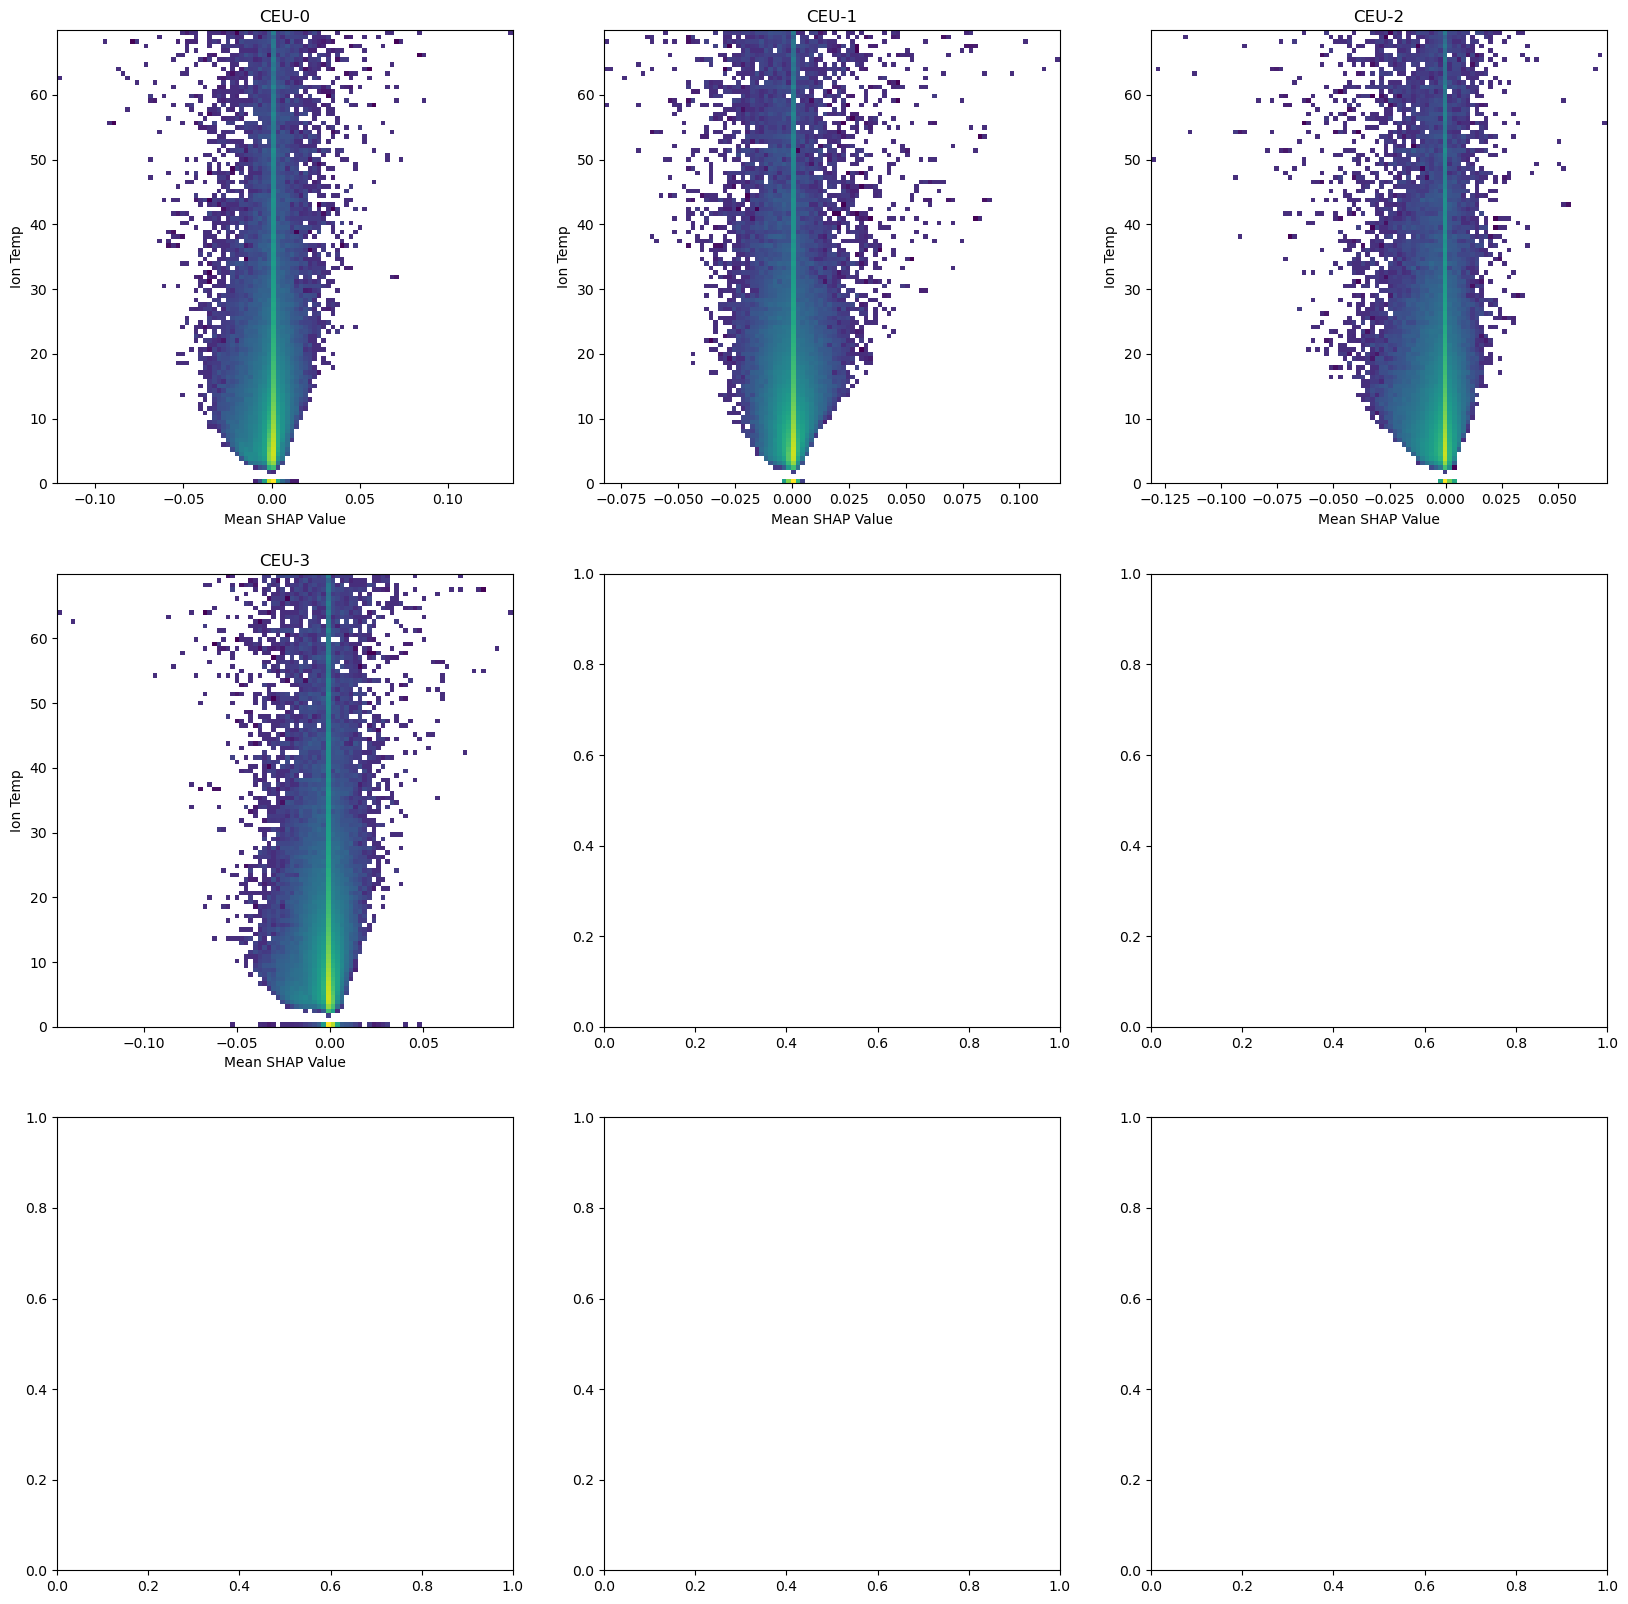

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(20,20))
for i, (reg, region) in enumerate(cluster_dict['central_european_cluster']['regions'].items()):
	axes[i//3,i%3].hist2d(region[f'{other_model}_shap']['mean_shap'].flatten(), region[f'{other_model}_shap']['twins_test'].flatten(), bins=100, norm=mpl.colors.LogNorm())
	axes[i//3,i%3].set_title(reg)
	axes[i//3,i%3].set_xlabel('Mean SHAP Value')
	axes[i//3,i%3].set_ylabel('Ion Temp')
plt.show()